# LSTMs for univariate time series forecasting
Problem: This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [1]:
# packages
import pandas as pd
import numpy as np
from numpy import array
import os
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import sys
sys.path.append("home/andressa/github_andressa/blog/lstms/functions.py")
import functions as fc

2024-06-27 19:20:13.182239: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 19:20:13.185760: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 19:20:13.227448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 19:20:13.892101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Dataset`s length: 
(144, 2)
Dataset`s columns: 
Index(['Month', 'Passengers'], dtype='object')
Dataset`s summary: 
count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64
Minimum date: 
Maximum date: 
Verifying the length of the data: 
True


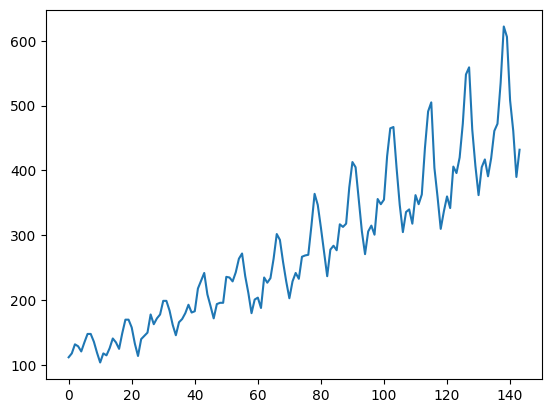

In [2]:
# dataset
df = fc.dataset_import()

# graph
plt.plot(np.array(df.Passengers))
plt.show()

The graph above shows a trend and a specific sazonality within the series. And, the number of passengers has grown over time. 

### LSTM for regression

In [3]:
# obtain train and test
train = fc.prepar_data(df = df, seeds = 10, value = 'Passengers', percent_train = 0.75, output = 1)
test = fc.prepar_data(df = df, seeds = 10, value = 'Passengers', percent_train = 0.75, output = 0)
norm = fc.prepar_data(df = df, seeds = 10, value = 'Passengers', percent_train = 0.75, output = 2)

# convert an array of values into a dataset matrix
look_back = 1
trainX, trainY = fc.create_dataset(train, look_back)
testX, testY = fc.create_dataset(train, look_back)

# resshape input to be [samples, time steps and features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

length train and test: 
108 36
length train and test: 
108 36
length train and test: 
108 36


In [4]:
# lstm model
output_data = fc.simulation_lstm(trainX, testX, trainY, testY, look_back, norm)

Epoch 1/100


2024-06-27 19:20:16.368129: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 8ms/step - loss: 0.0759
Epoch 2/100
106/106 - 0s - 606us/step - loss: 0.0397
Epoch 3/100
106/106 - 0s - 650us/step - loss: 0.0287
Epoch 4/100
106/106 - 0s - 602us/step - loss: 0.0251
Epoch 5/100
106/106 - 0s - 580us/step - loss: 0.0229
Epoch 6/100
106/106 - 0s - 670us/step - loss: 0.0210
Epoch 7/100
106/106 - 0s - 578us/step - loss: 0.0192
Epoch 8/100
106/106 - 0s - 603us/step - loss: 0.0174
Epoch 9/100
106/106 - 0s - 613us/step - loss: 0.0156
Epoch 10/100
106/106 - 0s - 566us/step - loss: 0.0139
Epoch 11/100
106/106 - 0s - 595us/step - loss: 0.0122
Epoch 12/100
106/106 - 0s - 643us/step - loss: 0.0106
Epoch 13/100
106/106 - 0s - 580us/step - loss: 0.0091
Epoch 14/100
106/106 - 0s - 636us/step - loss: 0.0078
Epoch 15/100
106/106 - 0s - 556us/step - loss: 0.0066
Epoch 16/100
106/106 - 0s - 584us/step - loss: 0.0055
Epoch 17/100
106/106 - 0s - 555us/step - loss: 0.0047
Epoch 18/100
106/106 - 0s - 559us/step - loss: 0.0040
Epoch 19/100
106/106 - 0s - 572us/step - loss: 0.00

/home/andressa/github_andressa/blog/lstms/functions.py:177: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  output_data['score_train'][elem], output_data['score_test'][elem] = score_train, score_test
/home/andressa/github_andressa/blog/lstms/f

106/106 - 1s - 6ms/step - loss: 0.0703
Epoch 2/100
106/106 - 0s - 542us/step - loss: 0.0416
Epoch 3/100
106/106 - 0s - 527us/step - loss: 0.0293
Epoch 4/100
106/106 - 0s - 519us/step - loss: 0.0246
Epoch 5/100
106/106 - 0s - 525us/step - loss: 0.0226
Epoch 6/100
106/106 - 0s - 525us/step - loss: 0.0211
Epoch 7/100
106/106 - 0s - 530us/step - loss: 0.0195
Epoch 8/100
106/106 - 0s - 519us/step - loss: 0.0178
Epoch 9/100
106/106 - 0s - 524us/step - loss: 0.0157
Epoch 10/100
106/106 - 0s - 527us/step - loss: 0.0134
Epoch 11/100
106/106 - 0s - 518us/step - loss: 0.0110
Epoch 12/100
106/106 - 0s - 518us/step - loss: 0.0088
Epoch 13/100
106/106 - 0s - 524us/step - loss: 0.0069
Epoch 14/100
106/106 - 0s - 525us/step - loss: 0.0054
Epoch 15/100
106/106 - 0s - 534us/step - loss: 0.0044
Epoch 16/100
106/106 - 0s - 522us/step - loss: 0.0037
Epoch 17/100
106/106 - 0s - 529us/step - loss: 0.0032
Epoch 18/100
106/106 - 0s - 505us/step - loss: 0.0029
Epoch 19/100
106/106 - 0s - 519us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0602
Epoch 2/100
106/106 - 0s - 535us/step - loss: 0.0316
Epoch 3/100
106/106 - 0s - 523us/step - loss: 0.0223
Epoch 4/100
106/106 - 0s - 538us/step - loss: 0.0194
Epoch 5/100
106/106 - 0s - 532us/step - loss: 0.0178
Epoch 6/100
106/106 - 0s - 543us/step - loss: 0.0164
Epoch 7/100
106/106 - 0s - 532us/step - loss: 0.0150
Epoch 8/100
106/106 - 0s - 541us/step - loss: 0.0135
Epoch 9/100
106/106 - 0s - 530us/step - loss: 0.0121
Epoch 10/100
106/106 - 0s - 537us/step - loss: 0.0107
Epoch 11/100
106/106 - 0s - 562us/step - loss: 0.0094
Epoch 12/100
106/106 - 0s - 586us/step - loss: 0.0081
Epoch 13/100
106/106 - 0s - 533us/step - loss: 0.0070
Epoch 14/100
106/106 - 0s - 520us/step - loss: 0.0060
Epoch 15/100
106/106 - 0s - 524us/step - loss: 0.0052
Epoch 16/100
106/106 - 0s - 519us/step - loss: 0.0045
Epoch 17/100
106/106 - 0s - 523us/step - loss: 0.0040
Epoch 18/100
106/106 - 0s - 515us/step - loss: 0.0036
Epoch 19/100
106/106 - 0s - 519us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0652
Epoch 2/100
106/106 - 0s - 549us/step - loss: 0.0366
Epoch 3/100
106/106 - 0s - 533us/step - loss: 0.0251
Epoch 4/100
106/106 - 0s - 574us/step - loss: 0.0219
Epoch 5/100
106/106 - 0s - 555us/step - loss: 0.0202
Epoch 6/100
106/106 - 0s - 566us/step - loss: 0.0188
Epoch 7/100
106/106 - 0s - 605us/step - loss: 0.0173
Epoch 8/100
106/106 - 0s - 580us/step - loss: 0.0157
Epoch 9/100
106/106 - 0s - 665us/step - loss: 0.0141
Epoch 10/100
106/106 - 0s - 600us/step - loss: 0.0124
Epoch 11/100
106/106 - 0s - 622us/step - loss: 0.0108
Epoch 12/100
106/106 - 0s - 608us/step - loss: 0.0092
Epoch 13/100
106/106 - 0s - 587us/step - loss: 0.0077
Epoch 14/100
106/106 - 0s - 604us/step - loss: 0.0064
Epoch 15/100
106/106 - 0s - 600us/step - loss: 0.0053
Epoch 16/100
106/106 - 0s - 580us/step - loss: 0.0044
Epoch 17/100
106/106 - 0s - 579us/step - loss: 0.0038
Epoch 18/100
106/106 - 0s - 566us/step - loss: 0.0033
Epoch 19/100
106/106 - 0s - 558us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0669
Epoch 2/100
106/106 - 0s - 576us/step - loss: 0.0391
Epoch 3/100
106/106 - 0s - 569us/step - loss: 0.0269
Epoch 4/100
106/106 - 0s - 541us/step - loss: 0.0226
Epoch 5/100
106/106 - 0s - 553us/step - loss: 0.0208
Epoch 6/100
106/106 - 0s - 560us/step - loss: 0.0194
Epoch 7/100
106/106 - 0s - 559us/step - loss: 0.0181
Epoch 8/100
106/106 - 0s - 547us/step - loss: 0.0167
Epoch 9/100
106/106 - 0s - 542us/step - loss: 0.0152
Epoch 10/100
106/106 - 0s - 591us/step - loss: 0.0138
Epoch 11/100
106/106 - 0s - 646us/step - loss: 0.0123
Epoch 12/100
106/106 - 0s - 563us/step - loss: 0.0108
Epoch 13/100
106/106 - 0s - 551us/step - loss: 0.0094
Epoch 14/100
106/106 - 0s - 561us/step - loss: 0.0081
Epoch 15/100
106/106 - 0s - 585us/step - loss: 0.0070
Epoch 16/100
106/106 - 0s - 608us/step - loss: 0.0059
Epoch 17/100
106/106 - 0s - 572us/step - loss: 0.0051
Epoch 18/100
106/106 - 0s - 545us/step - loss: 0.0044
Epoch 19/100
106/106 - 0s - 527us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 7ms/step - loss: 0.0621
Epoch 2/100
106/106 - 0s - 520us/step - loss: 0.0351
Epoch 3/100
106/106 - 0s - 513us/step - loss: 0.0242
Epoch 4/100
106/106 - 0s - 502us/step - loss: 0.0203
Epoch 5/100
106/106 - 0s - 528us/step - loss: 0.0184
Epoch 6/100
106/106 - 0s - 507us/step - loss: 0.0168
Epoch 7/100
106/106 - 0s - 516us/step - loss: 0.0153
Epoch 8/100
106/106 - 0s - 522us/step - loss: 0.0135
Epoch 9/100
106/106 - 0s - 509us/step - loss: 0.0117
Epoch 10/100
106/106 - 0s - 506us/step - loss: 0.0099
Epoch 11/100
106/106 - 0s - 513us/step - loss: 0.0081
Epoch 12/100
106/106 - 0s - 527us/step - loss: 0.0065
Epoch 13/100
106/106 - 0s - 518us/step - loss: 0.0052
Epoch 14/100
106/106 - 0s - 506us/step - loss: 0.0042
Epoch 15/100
106/106 - 0s - 506us/step - loss: 0.0036
Epoch 16/100
106/106 - 0s - 510us/step - loss: 0.0031
Epoch 17/100
106/106 - 0s - 501us/step - loss: 0.0029
Epoch 18/100
106/106 - 0s - 503us/step - loss: 0.0027
Epoch 19/100
106/106 - 0s - 493us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0673
Epoch 2/100
106/106 - 0s - 569us/step - loss: 0.0402
Epoch 3/100
106/106 - 0s - 555us/step - loss: 0.0270
Epoch 4/100
106/106 - 0s - 521us/step - loss: 0.0220
Epoch 5/100
106/106 - 0s - 523us/step - loss: 0.0196
Epoch 6/100
106/106 - 0s - 504us/step - loss: 0.0178
Epoch 7/100
106/106 - 0s - 504us/step - loss: 0.0160
Epoch 8/100
106/106 - 0s - 509us/step - loss: 0.0141
Epoch 9/100
106/106 - 0s - 564us/step - loss: 0.0121
Epoch 10/100
106/106 - 0s - 553us/step - loss: 0.0101
Epoch 11/100
106/106 - 0s - 517us/step - loss: 0.0083
Epoch 12/100
106/106 - 0s - 521us/step - loss: 0.0067
Epoch 13/100
106/106 - 0s - 512us/step - loss: 0.0054
Epoch 14/100
106/106 - 0s - 510us/step - loss: 0.0044
Epoch 15/100
106/106 - 0s - 562us/step - loss: 0.0037
Epoch 16/100
106/106 - 0s - 591us/step - loss: 0.0032
Epoch 17/100
106/106 - 0s - 614us/step - loss: 0.0030
Epoch 18/100
106/106 - 0s - 552us/step - loss: 0.0028
Epoch 19/100
106/106 - 0s - 578us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0710
Epoch 2/100
106/106 - 0s - 555us/step - loss: 0.0431
Epoch 3/100
106/106 - 0s - 628us/step - loss: 0.0296
Epoch 4/100
106/106 - 0s - 585us/step - loss: 0.0238
Epoch 5/100
106/106 - 0s - 733us/step - loss: 0.0211
Epoch 6/100
106/106 - 0s - 735us/step - loss: 0.0193
Epoch 7/100
106/106 - 0s - 626us/step - loss: 0.0176
Epoch 8/100
106/106 - 0s - 646us/step - loss: 0.0158
Epoch 9/100
106/106 - 0s - 624us/step - loss: 0.0140
Epoch 10/100
106/106 - 0s - 611us/step - loss: 0.0122
Epoch 11/100
106/106 - 0s - 649us/step - loss: 0.0104
Epoch 12/100
106/106 - 0s - 665us/step - loss: 0.0087
Epoch 13/100
106/106 - 0s - 631us/step - loss: 0.0071
Epoch 14/100
106/106 - 0s - 585us/step - loss: 0.0058
Epoch 15/100
106/106 - 0s - 824us/step - loss: 0.0048
Epoch 16/100
106/106 - 0s - 796us/step - loss: 0.0040
Epoch 17/100
106/106 - 0s - 655us/step - loss: 0.0035
Epoch 18/100
106/106 - 0s - 607us/step - loss: 0.0031
Epoch 19/100
106/106 - 0s - 595us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0662
Epoch 2/100
106/106 - 0s - 532us/step - loss: 0.0381
Epoch 3/100
106/106 - 0s - 528us/step - loss: 0.0264
Epoch 4/100
106/106 - 0s - 547us/step - loss: 0.0223
Epoch 5/100
106/106 - 0s - 541us/step - loss: 0.0204
Epoch 6/100
106/106 - 0s - 575us/step - loss: 0.0189
Epoch 7/100
106/106 - 0s - 543us/step - loss: 0.0173
Epoch 8/100
106/106 - 0s - 519us/step - loss: 0.0157
Epoch 9/100
106/106 - 0s - 527us/step - loss: 0.0141
Epoch 10/100
106/106 - 0s - 579us/step - loss: 0.0124
Epoch 11/100
106/106 - 0s - 561us/step - loss: 0.0108
Epoch 12/100
106/106 - 0s - 565us/step - loss: 0.0094
Epoch 13/100
106/106 - 0s - 660us/step - loss: 0.0080
Epoch 14/100
106/106 - 0s - 539us/step - loss: 0.0069
Epoch 15/100
106/106 - 0s - 596us/step - loss: 0.0059
Epoch 16/100
106/106 - 0s - 553us/step - loss: 0.0052
Epoch 17/100
106/106 - 0s - 508us/step - loss: 0.0046
Epoch 18/100
106/106 - 0s - 509us/step - loss: 0.0041
Epoch 19/100
106/106 - 0s - 539us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0549
Epoch 2/100
106/106 - 0s - 524us/step - loss: 0.0267
Epoch 3/100
106/106 - 0s - 515us/step - loss: 0.0191
Epoch 4/100
106/106 - 0s - 511us/step - loss: 0.0169
Epoch 5/100
106/106 - 0s - 512us/step - loss: 0.0154
Epoch 6/100
106/106 - 0s - 537us/step - loss: 0.0139
Epoch 7/100
106/106 - 0s - 522us/step - loss: 0.0125
Epoch 8/100
106/106 - 0s - 516us/step - loss: 0.0110
Epoch 9/100
106/106 - 0s - 510us/step - loss: 0.0095
Epoch 10/100
106/106 - 0s - 508us/step - loss: 0.0080
Epoch 11/100
106/106 - 0s - 503us/step - loss: 0.0066
Epoch 12/100
106/106 - 0s - 547us/step - loss: 0.0053
Epoch 13/100
106/106 - 0s - 522us/step - loss: 0.0044
Epoch 14/100
106/106 - 0s - 525us/step - loss: 0.0037
Epoch 15/100
106/106 - 0s - 524us/step - loss: 0.0032
Epoch 16/100
106/106 - 0s - 530us/step - loss: 0.0029
Epoch 17/100
106/106 - 0s - 512us/step - loss: 0.0028
Epoch 18/100
106/106 - 0s - 611us/step - loss: 0.0027
Epoch 19/100
106/106 - 0s - 507us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0688
Epoch 2/200
106/106 - 0s - 542us/step - loss: 0.0394
Epoch 3/200
106/106 - 0s - 517us/step - loss: 0.0278
Epoch 4/200
106/106 - 0s - 518us/step - loss: 0.0238
Epoch 5/200
106/106 - 0s - 505us/step - loss: 0.0221
Epoch 6/200
106/106 - 0s - 500us/step - loss: 0.0207
Epoch 7/200
106/106 - 0s - 503us/step - loss: 0.0194
Epoch 8/200
106/106 - 0s - 510us/step - loss: 0.0180
Epoch 9/200
106/106 - 0s - 511us/step - loss: 0.0165
Epoch 10/200
106/106 - 0s - 503us/step - loss: 0.0150
Epoch 11/200
106/106 - 0s - 521us/step - loss: 0.0134
Epoch 12/200
106/106 - 0s - 523us/step - loss: 0.0117
Epoch 13/200
106/106 - 0s - 523us/step - loss: 0.0101
Epoch 14/200
106/106 - 0s - 528us/step - loss: 0.0085
Epoch 15/200
106/106 - 0s - 518us/step - loss: 0.0070
Epoch 16/200
106/106 - 0s - 515us/step - loss: 0.0057
Epoch 17/200
106/106 - 0s - 506us/step - loss: 0.0047
Epoch 18/200
106/106 - 0s - 504us/step - loss: 0.0040
Epoch 19/200
106/106 - 0s - 498us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
106/106 - 1s - 6ms/step - loss: 0.0531
Epoch 2/200
106/106 - 0s - 513us/step - loss: 0.0266
Epoch 3/200
106/106 - 0s - 520us/step - loss: 0.0190
Epoch 4/200
106/106 - 0s - 509us/step - loss: 0.0167
Epoch 5/200
106/106 - 0s - 506us/step - loss: 0.0151
Epoch 6/200
106/106 - 0s - 516us/step - loss: 0.0135
Epoch 7/200
106/106 - 0s - 512us/step - loss: 0.0120
Epoch 8/200
106/106 - 0s - 526us/step - loss: 0.0104
Epoch 9/200
106/106 - 0s - 519us/step - loss: 0.0089
Epoch 10/200
106/106 - 0s - 523us/step - loss: 0.0076
Epoch 11/200
106/106 - 0s - 532us/step - loss: 0.0063
Epoch 12/200
106/106 - 0s - 517us/step - loss: 0.0053
Epoch 13/200
106/106 - 0s - 515us/step - loss: 0.0045
Epoch 14/200
106/106 - 0s - 529us/step - loss: 0.0039
Epoch 15/200
106/106 - 0s - 529us/step - loss: 0.0034
Epoch 16/200
106/106 - 0s - 521us/step - loss: 0.0031
Epoch 17/200
106/106 - 0s - 519us/step - loss: 0.0029
Epoch 18/200
106/106 - 0s - 510us/step - loss: 0.0028
Epoch 19/200
106/106 - 0s - 512us/step 

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0723
Epoch 2/200
106/106 - 0s - 522us/step - loss: 0.0443
Epoch 3/200
106/106 - 0s - 511us/step - loss: 0.0316
Epoch 4/200
106/106 - 0s - 525us/step - loss: 0.0265
Epoch 5/200
106/106 - 0s - 522us/step - loss: 0.0244
Epoch 6/200
106/106 - 0s - 511us/step - loss: 0.0231
Epoch 7/200
106/106 - 0s - 526us/step - loss: 0.0218
Epoch 8/200
106/106 - 0s - 515us/step - loss: 0.0204
Epoch 9/200
106/106 - 0s - 530us/step - loss: 0.0185
Epoch 10/200
106/106 - 0s - 514us/step - loss: 0.0162
Epoch 11/200
106/106 - 0s - 522us/step - loss: 0.0137
Epoch 12/200
106/106 - 0s - 527us/step - loss: 0.0112
Epoch 13/200
106/106 - 0s - 514us/step - loss: 0.0089
Epoch 14/200
106/106 - 0s - 521us/step - loss: 0.0070
Epoch 15/200
106/106 - 0s - 513us/step - loss: 0.0056
Epoch 16/200
106/106 - 0s - 527us/step - loss: 0.0046
Epoch 17/200
106/106 - 0s - 519us/step - loss: 0.0039
Epoch 18/200
106/106 - 0s - 514us/step - loss: 0.0034
Epoch 19/200
106/106 - 0s - 518us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0665
Epoch 2/200
106/106 - 0s - 604us/step - loss: 0.0384
Epoch 3/200
106/106 - 0s - 505us/step - loss: 0.0271
Epoch 4/200
106/106 - 0s - 508us/step - loss: 0.0225
Epoch 5/200
106/106 - 0s - 513us/step - loss: 0.0201
Epoch 6/200
106/106 - 0s - 516us/step - loss: 0.0182
Epoch 7/200
106/106 - 0s - 511us/step - loss: 0.0163
Epoch 8/200
106/106 - 0s - 502us/step - loss: 0.0142
Epoch 9/200
106/106 - 0s - 505us/step - loss: 0.0121
Epoch 10/200
106/106 - 0s - 503us/step - loss: 0.0100
Epoch 11/200
106/106 - 0s - 514us/step - loss: 0.0082
Epoch 12/200
106/106 - 0s - 508us/step - loss: 0.0067
Epoch 13/200
106/106 - 0s - 510us/step - loss: 0.0056
Epoch 14/200
106/106 - 0s - 523us/step - loss: 0.0048
Epoch 15/200
106/106 - 0s - 510us/step - loss: 0.0042
Epoch 16/200
106/106 - 0s - 513us/step - loss: 0.0037
Epoch 17/200
106/106 - 0s - 505us/step - loss: 0.0034
Epoch 18/200
106/106 - 0s - 516us/step - loss: 0.0031
Epoch 19/200
106/106 - 0s - 512us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0635
Epoch 2/200
106/106 - 0s - 531us/step - loss: 0.0354
Epoch 3/200
106/106 - 0s - 515us/step - loss: 0.0244
Epoch 4/200
106/106 - 0s - 511us/step - loss: 0.0205
Epoch 5/200
106/106 - 0s - 519us/step - loss: 0.0186
Epoch 6/200
106/106 - 0s - 531us/step - loss: 0.0170
Epoch 7/200
106/106 - 0s - 530us/step - loss: 0.0153
Epoch 8/200
106/106 - 0s - 518us/step - loss: 0.0135
Epoch 9/200
106/106 - 0s - 535us/step - loss: 0.0116
Epoch 10/200
106/106 - 0s - 511us/step - loss: 0.0096
Epoch 11/200
106/106 - 0s - 510us/step - loss: 0.0078
Epoch 12/200
106/106 - 0s - 520us/step - loss: 0.0062
Epoch 13/200
106/106 - 0s - 544us/step - loss: 0.0050
Epoch 14/200
106/106 - 0s - 519us/step - loss: 0.0041
Epoch 15/200
106/106 - 0s - 529us/step - loss: 0.0036
Epoch 16/200
106/106 - 0s - 514us/step - loss: 0.0032
Epoch 17/200
106/106 - 0s - 534us/step - loss: 0.0029
Epoch 18/200
106/106 - 0s - 515us/step - loss: 0.0028
Epoch 19/200
106/106 - 0s - 508us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0678
Epoch 2/200
106/106 - 0s - 508us/step - loss: 0.0399
Epoch 3/200
106/106 - 0s - 504us/step - loss: 0.0269
Epoch 4/200
106/106 - 0s - 511us/step - loss: 0.0227
Epoch 5/200
106/106 - 0s - 509us/step - loss: 0.0208
Epoch 6/200
106/106 - 0s - 509us/step - loss: 0.0194
Epoch 7/200
106/106 - 0s - 526us/step - loss: 0.0180
Epoch 8/200
106/106 - 0s - 514us/step - loss: 0.0165
Epoch 9/200
106/106 - 0s - 511us/step - loss: 0.0150
Epoch 10/200
106/106 - 0s - 518us/step - loss: 0.0135
Epoch 11/200
106/106 - 0s - 502us/step - loss: 0.0119
Epoch 12/200
106/106 - 0s - 521us/step - loss: 0.0104
Epoch 13/200
106/106 - 0s - 505us/step - loss: 0.0090
Epoch 14/200
106/106 - 0s - 508us/step - loss: 0.0077
Epoch 15/200
106/106 - 0s - 612us/step - loss: 0.0066
Epoch 16/200
106/106 - 0s - 507us/step - loss: 0.0056
Epoch 17/200
106/106 - 0s - 497us/step - loss: 0.0048
Epoch 18/200
106/106 - 0s - 505us/step - loss: 0.0042
Epoch 19/200
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0650
Epoch 2/200
106/106 - 0s - 542us/step - loss: 0.0360
Epoch 3/200
106/106 - 0s - 521us/step - loss: 0.0246
Epoch 4/200
106/106 - 0s - 511us/step - loss: 0.0209
Epoch 5/200
106/106 - 0s - 509us/step - loss: 0.0190
Epoch 6/200
106/106 - 0s - 516us/step - loss: 0.0175
Epoch 7/200
106/106 - 0s - 516us/step - loss: 0.0160
Epoch 8/200
106/106 - 0s - 508us/step - loss: 0.0145
Epoch 9/200
106/106 - 0s - 504us/step - loss: 0.0129
Epoch 10/200
106/106 - 0s - 510us/step - loss: 0.0114
Epoch 11/200
106/106 - 0s - 509us/step - loss: 0.0099
Epoch 12/200
106/106 - 0s - 510us/step - loss: 0.0085
Epoch 13/200
106/106 - 0s - 518us/step - loss: 0.0073
Epoch 14/200
106/106 - 0s - 514us/step - loss: 0.0062
Epoch 15/200
106/106 - 0s - 505us/step - loss: 0.0053
Epoch 16/200
106/106 - 0s - 505us/step - loss: 0.0046
Epoch 17/200
106/106 - 0s - 508us/step - loss: 0.0040
Epoch 18/200
106/106 - 0s - 501us/step - loss: 0.0036
Epoch 19/200
106/106 - 0s - 496us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0685
Epoch 2/200
106/106 - 0s - 545us/step - loss: 0.0412
Epoch 3/200
106/106 - 0s - 512us/step - loss: 0.0279
Epoch 4/200
106/106 - 0s - 533us/step - loss: 0.0229
Epoch 5/200
106/106 - 0s - 512us/step - loss: 0.0204
Epoch 6/200
106/106 - 0s - 522us/step - loss: 0.0185
Epoch 7/200
106/106 - 0s - 513us/step - loss: 0.0165
Epoch 8/200
106/106 - 0s - 506us/step - loss: 0.0144
Epoch 9/200
106/106 - 0s - 512us/step - loss: 0.0124
Epoch 10/200
106/106 - 0s - 514us/step - loss: 0.0104
Epoch 11/200
106/106 - 0s - 514us/step - loss: 0.0086
Epoch 12/200
106/106 - 0s - 554us/step - loss: 0.0070
Epoch 13/200
106/106 - 0s - 535us/step - loss: 0.0057
Epoch 14/200
106/106 - 0s - 510us/step - loss: 0.0048
Epoch 15/200
106/106 - 0s - 515us/step - loss: 0.0041
Epoch 16/200
106/106 - 0s - 508us/step - loss: 0.0035
Epoch 17/200
106/106 - 0s - 518us/step - loss: 0.0032
Epoch 18/200
106/106 - 0s - 552us/step - loss: 0.0029
Epoch 19/200
106/106 - 0s - 529us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0289
Epoch 2/200
106/106 - 0s - 548us/step - loss: 0.0128
Epoch 3/200
106/106 - 0s - 512us/step - loss: 0.0104
Epoch 4/200
106/106 - 0s - 529us/step - loss: 0.0089
Epoch 5/200
106/106 - 0s - 523us/step - loss: 0.0075
Epoch 6/200
106/106 - 0s - 538us/step - loss: 0.0063
Epoch 7/200
106/106 - 0s - 526us/step - loss: 0.0052
Epoch 8/200
106/106 - 0s - 564us/step - loss: 0.0044
Epoch 9/200
106/106 - 0s - 525us/step - loss: 0.0037
Epoch 10/200
106/106 - 0s - 520us/step - loss: 0.0033
Epoch 11/200
106/106 - 0s - 530us/step - loss: 0.0030
Epoch 12/200
106/106 - 0s - 522us/step - loss: 0.0028
Epoch 13/200
106/106 - 0s - 527us/step - loss: 0.0027
Epoch 14/200
106/106 - 0s - 518us/step - loss: 0.0026
Epoch 15/200
106/106 - 0s - 515us/step - loss: 0.0026
Epoch 16/200
106/106 - 0s - 526us/step - loss: 0.0025
Epoch 17/200
106/106 - 0s - 533us/step - loss: 0.0025
Epoch 18/200
106/106 - 0s - 586us/step - loss: 0.0025
Epoch 19/200
106/106 - 0s - 569us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0762
Epoch 2/200
106/106 - 0s - 563us/step - loss: 0.0428
Epoch 3/200
106/106 - 0s - 533us/step - loss: 0.0289
Epoch 4/200
106/106 - 0s - 551us/step - loss: 0.0241
Epoch 5/200
106/106 - 0s - 533us/step - loss: 0.0218
Epoch 6/200
106/106 - 0s - 519us/step - loss: 0.0199
Epoch 7/200
106/106 - 0s - 531us/step - loss: 0.0179
Epoch 8/200
106/106 - 0s - 523us/step - loss: 0.0158
Epoch 9/200
106/106 - 0s - 527us/step - loss: 0.0137
Epoch 10/200
106/106 - 0s - 520us/step - loss: 0.0116
Epoch 11/200
106/106 - 0s - 509us/step - loss: 0.0098
Epoch 12/200
106/106 - 0s - 548us/step - loss: 0.0082
Epoch 13/200
106/106 - 0s - 523us/step - loss: 0.0068
Epoch 14/200
106/106 - 0s - 524us/step - loss: 0.0058
Epoch 15/200
106/106 - 0s - 510us/step - loss: 0.0049
Epoch 16/200
106/106 - 0s - 517us/step - loss: 0.0043
Epoch 17/200
106/106 - 0s - 541us/step - loss: 0.0038
Epoch 18/200
106/106 - 0s - 551us/step - loss: 0.0034
Epoch 19/200
106/106 - 0s - 534us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0569
Epoch 2/300
106/106 - 0s - 517us/step - loss: 0.0289
Epoch 3/300
106/106 - 0s - 514us/step - loss: 0.0204
Epoch 4/300
106/106 - 0s - 523us/step - loss: 0.0176
Epoch 5/300
106/106 - 0s - 515us/step - loss: 0.0160
Epoch 6/300
106/106 - 0s - 517us/step - loss: 0.0146
Epoch 7/300
106/106 - 0s - 532us/step - loss: 0.0133
Epoch 8/300
106/106 - 0s - 545us/step - loss: 0.0119
Epoch 9/300
106/106 - 0s - 539us/step - loss: 0.0106
Epoch 10/300
106/106 - 0s - 537us/step - loss: 0.0094
Epoch 11/300
106/106 - 0s - 533us/step - loss: 0.0082
Epoch 12/300
106/106 - 0s - 542us/step - loss: 0.0072
Epoch 13/300
106/106 - 0s - 527us/step - loss: 0.0063
Epoch 14/300
106/106 - 0s - 529us/step - loss: 0.0055
Epoch 15/300
106/106 - 0s - 514us/step - loss: 0.0048
Epoch 16/300
106/106 - 0s - 530us/step - loss: 0.0043
Epoch 17/300
106/106 - 0s - 506us/step - loss: 0.0038
Epoch 18/300
106/106 - 0s - 503us/step - loss: 0.0035
Epoch 19/300
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0698
Epoch 2/300
106/106 - 0s - 526us/step - loss: 0.0398
Epoch 3/300
106/106 - 0s - 503us/step - loss: 0.0275
Epoch 4/300
106/106 - 0s - 510us/step - loss: 0.0229
Epoch 5/300
106/106 - 0s - 518us/step - loss: 0.0209
Epoch 6/300
106/106 - 0s - 510us/step - loss: 0.0194
Epoch 7/300
106/106 - 0s - 515us/step - loss: 0.0182
Epoch 8/300
106/106 - 0s - 525us/step - loss: 0.0169
Epoch 9/300
106/106 - 0s - 549us/step - loss: 0.0156
Epoch 10/300
106/106 - 0s - 530us/step - loss: 0.0143
Epoch 11/300
106/106 - 0s - 508us/step - loss: 0.0131
Epoch 12/300
106/106 - 0s - 518us/step - loss: 0.0118
Epoch 13/300
106/106 - 0s - 546us/step - loss: 0.0105
Epoch 14/300
106/106 - 0s - 529us/step - loss: 0.0093
Epoch 15/300
106/106 - 0s - 532us/step - loss: 0.0081
Epoch 16/300
106/106 - 0s - 507us/step - loss: 0.0070
Epoch 17/300
106/106 - 0s - 547us/step - loss: 0.0060
Epoch 18/300
106/106 - 0s - 507us/step - loss: 0.0051
Epoch 19/300
106/106 - 0s - 535us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0738
Epoch 2/300
106/106 - 0s - 516us/step - loss: 0.0436
Epoch 3/300
106/106 - 0s - 509us/step - loss: 0.0313
Epoch 4/300
106/106 - 0s - 505us/step - loss: 0.0268
Epoch 5/300
106/106 - 0s - 511us/step - loss: 0.0249
Epoch 6/300
106/106 - 0s - 504us/step - loss: 0.0236
Epoch 7/300
106/106 - 0s - 518us/step - loss: 0.0225
Epoch 8/300
106/106 - 0s - 510us/step - loss: 0.0214
Epoch 9/300
106/106 - 0s - 501us/step - loss: 0.0203
Epoch 10/300
106/106 - 0s - 513us/step - loss: 0.0192
Epoch 11/300
106/106 - 0s - 511us/step - loss: 0.0180
Epoch 12/300
106/106 - 0s - 520us/step - loss: 0.0167
Epoch 13/300
106/106 - 0s - 511us/step - loss: 0.0155
Epoch 14/300
106/106 - 0s - 517us/step - loss: 0.0142
Epoch 15/300
106/106 - 0s - 515us/step - loss: 0.0129
Epoch 16/300
106/106 - 0s - 523us/step - loss: 0.0116
Epoch 17/300
106/106 - 0s - 523us/step - loss: 0.0103
Epoch 18/300
106/106 - 0s - 507us/step - loss: 0.0091
Epoch 19/300
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0671
Epoch 2/300
106/106 - 0s - 611us/step - loss: 0.0392
Epoch 3/300
106/106 - 0s - 518us/step - loss: 0.0275
Epoch 4/300
106/106 - 0s - 519us/step - loss: 0.0233
Epoch 5/300
106/106 - 0s - 524us/step - loss: 0.0215
Epoch 6/300
106/106 - 0s - 522us/step - loss: 0.0203
Epoch 7/300
106/106 - 0s - 530us/step - loss: 0.0192
Epoch 8/300
106/106 - 0s - 512us/step - loss: 0.0180
Epoch 9/300
106/106 - 0s - 524us/step - loss: 0.0168
Epoch 10/300
106/106 - 0s - 504us/step - loss: 0.0154
Epoch 11/300
106/106 - 0s - 514us/step - loss: 0.0139
Epoch 12/300
106/106 - 0s - 524us/step - loss: 0.0121
Epoch 13/300
106/106 - 0s - 515us/step - loss: 0.0102
Epoch 14/300
106/106 - 0s - 534us/step - loss: 0.0082
Epoch 15/300
106/106 - 0s - 522us/step - loss: 0.0063
Epoch 16/300
106/106 - 0s - 516us/step - loss: 0.0048
Epoch 17/300
106/106 - 0s - 520us/step - loss: 0.0037
Epoch 18/300
106/106 - 0s - 516us/step - loss: 0.0031
Epoch 19/300
106/106 - 0s - 507us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0650
Epoch 2/300
106/106 - 0s - 548us/step - loss: 0.0378
Epoch 3/300
106/106 - 0s - 555us/step - loss: 0.0260
Epoch 4/300
106/106 - 0s - 528us/step - loss: 0.0214
Epoch 5/300
106/106 - 0s - 503us/step - loss: 0.0190
Epoch 6/300
106/106 - 0s - 527us/step - loss: 0.0170
Epoch 7/300
106/106 - 0s - 552us/step - loss: 0.0151
Epoch 8/300
106/106 - 0s - 567us/step - loss: 0.0131
Epoch 9/300
106/106 - 0s - 524us/step - loss: 0.0112
Epoch 10/300
106/106 - 0s - 523us/step - loss: 0.0094
Epoch 11/300
106/106 - 0s - 518us/step - loss: 0.0078
Epoch 12/300
106/106 - 0s - 527us/step - loss: 0.0066
Epoch 13/300
106/106 - 0s - 517us/step - loss: 0.0055
Epoch 14/300
106/106 - 0s - 515us/step - loss: 0.0048
Epoch 15/300
106/106 - 0s - 511us/step - loss: 0.0042
Epoch 16/300
106/106 - 0s - 507us/step - loss: 0.0037
Epoch 17/300
106/106 - 0s - 522us/step - loss: 0.0034
Epoch 18/300
106/106 - 0s - 505us/step - loss: 0.0031
Epoch 19/300
106/106 - 0s - 504us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0731
Epoch 2/300
106/106 - 0s - 534us/step - loss: 0.0441
Epoch 3/300
106/106 - 0s - 559us/step - loss: 0.0313
Epoch 4/300
106/106 - 0s - 541us/step - loss: 0.0259
Epoch 5/300
106/106 - 0s - 542us/step - loss: 0.0232
Epoch 6/300
106/106 - 0s - 518us/step - loss: 0.0214
Epoch 7/300
106/106 - 0s - 531us/step - loss: 0.0197
Epoch 8/300
106/106 - 0s - 537us/step - loss: 0.0179
Epoch 9/300
106/106 - 0s - 544us/step - loss: 0.0161
Epoch 10/300
106/106 - 0s - 575us/step - loss: 0.0141
Epoch 11/300
106/106 - 0s - 540us/step - loss: 0.0121
Epoch 12/300
106/106 - 0s - 527us/step - loss: 0.0101
Epoch 13/300
106/106 - 0s - 517us/step - loss: 0.0081
Epoch 14/300
106/106 - 0s - 552us/step - loss: 0.0064
Epoch 15/300
106/106 - 0s - 537us/step - loss: 0.0050
Epoch 16/300
106/106 - 0s - 561us/step - loss: 0.0039
Epoch 17/300
106/106 - 0s - 561us/step - loss: 0.0033
Epoch 18/300
106/106 - 0s - 574us/step - loss: 0.0029
Epoch 19/300
106/106 - 0s - 561us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0691
Epoch 2/300
106/106 - 0s - 527us/step - loss: 0.0414
Epoch 3/300
106/106 - 0s - 520us/step - loss: 0.0289
Epoch 4/300
106/106 - 0s - 510us/step - loss: 0.0241
Epoch 5/300
106/106 - 0s - 520us/step - loss: 0.0221
Epoch 6/300
106/106 - 0s - 519us/step - loss: 0.0207
Epoch 7/300
106/106 - 0s - 545us/step - loss: 0.0195
Epoch 8/300
106/106 - 0s - 537us/step - loss: 0.0182
Epoch 9/300
106/106 - 0s - 530us/step - loss: 0.0170
Epoch 10/300
106/106 - 0s - 521us/step - loss: 0.0157
Epoch 11/300
106/106 - 0s - 528us/step - loss: 0.0145
Epoch 12/300
106/106 - 0s - 513us/step - loss: 0.0131
Epoch 13/300
106/106 - 0s - 517us/step - loss: 0.0118
Epoch 14/300
106/106 - 0s - 532us/step - loss: 0.0105
Epoch 15/300
106/106 - 0s - 537us/step - loss: 0.0093
Epoch 16/300
106/106 - 0s - 538us/step - loss: 0.0082
Epoch 17/300
106/106 - 0s - 506us/step - loss: 0.0071
Epoch 18/300
106/106 - 0s - 510us/step - loss: 0.0062
Epoch 19/300
106/106 - 0s - 514us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0867
Epoch 2/300
106/106 - 0s - 556us/step - loss: 0.0486
Epoch 3/300
106/106 - 0s - 532us/step - loss: 0.0334
Epoch 4/300
106/106 - 0s - 528us/step - loss: 0.0280
Epoch 5/300
106/106 - 0s - 526us/step - loss: 0.0257
Epoch 6/300
106/106 - 0s - 519us/step - loss: 0.0240
Epoch 7/300
106/106 - 0s - 526us/step - loss: 0.0223
Epoch 8/300
106/106 - 0s - 515us/step - loss: 0.0202
Epoch 9/300
106/106 - 0s - 525us/step - loss: 0.0177
Epoch 10/300
106/106 - 0s - 530us/step - loss: 0.0148
Epoch 11/300
106/106 - 0s - 521us/step - loss: 0.0118
Epoch 12/300
106/106 - 0s - 526us/step - loss: 0.0090
Epoch 13/300
106/106 - 0s - 523us/step - loss: 0.0068
Epoch 14/300
106/106 - 0s - 546us/step - loss: 0.0051
Epoch 15/300
106/106 - 0s - 541us/step - loss: 0.0040
Epoch 16/300
106/106 - 0s - 536us/step - loss: 0.0033
Epoch 17/300
106/106 - 0s - 528us/step - loss: 0.0029
Epoch 18/300
106/106 - 0s - 529us/step - loss: 0.0027
Epoch 19/300
106/106 - 0s - 522us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0630
Epoch 2/300
106/106 - 0s - 518us/step - loss: 0.0322
Epoch 3/300
106/106 - 0s - 509us/step - loss: 0.0223
Epoch 4/300
106/106 - 0s - 519us/step - loss: 0.0193
Epoch 5/300
106/106 - 0s - 514us/step - loss: 0.0175
Epoch 6/300
106/106 - 0s - 509us/step - loss: 0.0159
Epoch 7/300
106/106 - 0s - 515us/step - loss: 0.0143
Epoch 8/300
106/106 - 0s - 523us/step - loss: 0.0128
Epoch 9/300
106/106 - 0s - 515us/step - loss: 0.0112
Epoch 10/300
106/106 - 0s - 516us/step - loss: 0.0097
Epoch 11/300
106/106 - 0s - 511us/step - loss: 0.0084
Epoch 12/300
106/106 - 0s - 517us/step - loss: 0.0071
Epoch 13/300
106/106 - 0s - 516us/step - loss: 0.0060
Epoch 14/300
106/106 - 0s - 512us/step - loss: 0.0051
Epoch 15/300
106/106 - 0s - 513us/step - loss: 0.0043
Epoch 16/300
106/106 - 0s - 510us/step - loss: 0.0038
Epoch 17/300
106/106 - 0s - 532us/step - loss: 0.0033
Epoch 18/300
106/106 - 0s - 521us/step - loss: 0.0031
Epoch 19/300
106/106 - 0s - 512us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0634
Epoch 2/300
106/106 - 0s - 560us/step - loss: 0.0363
Epoch 3/300
106/106 - 0s - 559us/step - loss: 0.0246
Epoch 4/300
106/106 - 0s - 598us/step - loss: 0.0202
Epoch 5/300
106/106 - 0s - 538us/step - loss: 0.0182
Epoch 6/300
106/106 - 0s - 528us/step - loss: 0.0166
Epoch 7/300
106/106 - 0s - 559us/step - loss: 0.0151
Epoch 8/300
106/106 - 0s - 603us/step - loss: 0.0135
Epoch 9/300
106/106 - 0s - 548us/step - loss: 0.0119
Epoch 10/300
106/106 - 0s - 611us/step - loss: 0.0104
Epoch 11/300
106/106 - 0s - 593us/step - loss: 0.0089
Epoch 12/300
106/106 - 0s - 584us/step - loss: 0.0076
Epoch 13/300
106/106 - 0s - 527us/step - loss: 0.0064
Epoch 14/300
106/106 - 0s - 529us/step - loss: 0.0054
Epoch 15/300
106/106 - 0s - 533us/step - loss: 0.0046
Epoch 16/300
106/106 - 0s - 562us/step - loss: 0.0040
Epoch 17/300
106/106 - 0s - 557us/step - loss: 0.0036
Epoch 18/300
106/106 - 0s - 592us/step - loss: 0.0033
Epoch 19/300
106/106 - 0s - 588us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0736
Epoch 2/400
106/106 - 0s - 619us/step - loss: 0.0447
Epoch 3/400
106/106 - 0s - 512us/step - loss: 0.0327
Epoch 4/400
106/106 - 0s - 525us/step - loss: 0.0276
Epoch 5/400
106/106 - 0s - 517us/step - loss: 0.0250
Epoch 6/400
106/106 - 0s - 525us/step - loss: 0.0233
Epoch 7/400
106/106 - 0s - 507us/step - loss: 0.0218
Epoch 8/400
106/106 - 0s - 496us/step - loss: 0.0202
Epoch 9/400
106/106 - 0s - 500us/step - loss: 0.0184
Epoch 10/400
106/106 - 0s - 523us/step - loss: 0.0164
Epoch 11/400
106/106 - 0s - 522us/step - loss: 0.0143
Epoch 12/400
106/106 - 0s - 516us/step - loss: 0.0122
Epoch 13/400
106/106 - 0s - 507us/step - loss: 0.0102
Epoch 14/400
106/106 - 0s - 543us/step - loss: 0.0085
Epoch 15/400
106/106 - 0s - 512us/step - loss: 0.0071
Epoch 16/400
106/106 - 0s - 527us/step - loss: 0.0060
Epoch 17/400
106/106 - 0s - 499us/step - loss: 0.0051
Epoch 18/400
106/106 - 0s - 495us/step - loss: 0.0044
Epoch 19/400
106/106 - 0s - 510us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0698
Epoch 2/400
106/106 - 0s - 554us/step - loss: 0.0392
Epoch 3/400
106/106 - 0s - 530us/step - loss: 0.0271
Epoch 4/400
106/106 - 0s - 530us/step - loss: 0.0232
Epoch 5/400
106/106 - 0s - 545us/step - loss: 0.0214
Epoch 6/400
106/106 - 0s - 538us/step - loss: 0.0199
Epoch 7/400
106/106 - 0s - 523us/step - loss: 0.0184
Epoch 8/400
106/106 - 0s - 560us/step - loss: 0.0169
Epoch 9/400
106/106 - 0s - 517us/step - loss: 0.0154
Epoch 10/400
106/106 - 0s - 539us/step - loss: 0.0139
Epoch 11/400
106/106 - 0s - 523us/step - loss: 0.0124
Epoch 12/400
106/106 - 0s - 518us/step - loss: 0.0109
Epoch 13/400
106/106 - 0s - 546us/step - loss: 0.0095
Epoch 14/400
106/106 - 0s - 526us/step - loss: 0.0082
Epoch 15/400
106/106 - 0s - 545us/step - loss: 0.0070
Epoch 16/400
106/106 - 0s - 537us/step - loss: 0.0060
Epoch 17/400
106/106 - 0s - 526us/step - loss: 0.0051
Epoch 18/400
106/106 - 0s - 521us/step - loss: 0.0044
Epoch 19/400
106/106 - 0s - 533us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0707
Epoch 2/400
106/106 - 0s - 535us/step - loss: 0.0410
Epoch 3/400
106/106 - 0s - 511us/step - loss: 0.0288
Epoch 4/400
106/106 - 0s - 510us/step - loss: 0.0245
Epoch 5/400
106/106 - 0s - 515us/step - loss: 0.0226
Epoch 6/400
106/106 - 0s - 511us/step - loss: 0.0211
Epoch 7/400
106/106 - 0s - 522us/step - loss: 0.0198
Epoch 8/400
106/106 - 0s - 502us/step - loss: 0.0185
Epoch 9/400
106/106 - 0s - 509us/step - loss: 0.0171
Epoch 10/400
106/106 - 0s - 521us/step - loss: 0.0157
Epoch 11/400
106/106 - 0s - 513us/step - loss: 0.0143
Epoch 12/400
106/106 - 0s - 543us/step - loss: 0.0129
Epoch 13/400
106/106 - 0s - 522us/step - loss: 0.0114
Epoch 14/400
106/106 - 0s - 513us/step - loss: 0.0101
Epoch 15/400
106/106 - 0s - 515us/step - loss: 0.0088
Epoch 16/400
106/106 - 0s - 503us/step - loss: 0.0076
Epoch 17/400
106/106 - 0s - 510us/step - loss: 0.0066
Epoch 18/400
106/106 - 0s - 505us/step - loss: 0.0057
Epoch 19/400
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0592
Epoch 2/400
106/106 - 0s - 516us/step - loss: 0.0320
Epoch 3/400
106/106 - 0s - 503us/step - loss: 0.0222
Epoch 4/400
106/106 - 0s - 511us/step - loss: 0.0188
Epoch 5/400
106/106 - 0s - 512us/step - loss: 0.0169
Epoch 6/400
106/106 - 0s - 509us/step - loss: 0.0154
Epoch 7/400
106/106 - 0s - 503us/step - loss: 0.0139
Epoch 8/400
106/106 - 0s - 514us/step - loss: 0.0124
Epoch 9/400
106/106 - 0s - 504us/step - loss: 0.0110
Epoch 10/400
106/106 - 0s - 518us/step - loss: 0.0095
Epoch 11/400
106/106 - 0s - 520us/step - loss: 0.0082
Epoch 12/400
106/106 - 0s - 510us/step - loss: 0.0071
Epoch 13/400
106/106 - 0s - 508us/step - loss: 0.0060
Epoch 14/400
106/106 - 0s - 512us/step - loss: 0.0052
Epoch 15/400
106/106 - 0s - 524us/step - loss: 0.0045
Epoch 16/400
106/106 - 0s - 526us/step - loss: 0.0040
Epoch 17/400
106/106 - 0s - 518us/step - loss: 0.0036
Epoch 18/400
106/106 - 0s - 500us/step - loss: 0.0033
Epoch 19/400
106/106 - 0s - 498us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0600
Epoch 2/400
106/106 - 0s - 552us/step - loss: 0.0332
Epoch 3/400
106/106 - 0s - 629us/step - loss: 0.0227
Epoch 4/400
106/106 - 0s - 535us/step - loss: 0.0192
Epoch 5/400
106/106 - 0s - 585us/step - loss: 0.0174
Epoch 6/400
106/106 - 0s - 577us/step - loss: 0.0157
Epoch 7/400
106/106 - 0s - 614us/step - loss: 0.0140
Epoch 8/400
106/106 - 0s - 578us/step - loss: 0.0121
Epoch 9/400
106/106 - 0s - 569us/step - loss: 0.0102
Epoch 10/400
106/106 - 0s - 546us/step - loss: 0.0083
Epoch 11/400
106/106 - 0s - 542us/step - loss: 0.0067
Epoch 12/400
106/106 - 0s - 516us/step - loss: 0.0053
Epoch 13/400
106/106 - 0s - 527us/step - loss: 0.0043
Epoch 14/400
106/106 - 0s - 541us/step - loss: 0.0036
Epoch 15/400
106/106 - 0s - 521us/step - loss: 0.0031
Epoch 16/400
106/106 - 0s - 534us/step - loss: 0.0029
Epoch 17/400
106/106 - 0s - 511us/step - loss: 0.0027
Epoch 18/400
106/106 - 0s - 514us/step - loss: 0.0026
Epoch 19/400
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 10ms/step - loss: 0.0695
Epoch 2/400
106/106 - 0s - 538us/step - loss: 0.0409
Epoch 3/400
106/106 - 0s - 522us/step - loss: 0.0285
Epoch 4/400
106/106 - 0s - 525us/step - loss: 0.0235
Epoch 5/400
106/106 - 0s - 516us/step - loss: 0.0209
Epoch 6/400
106/106 - 0s - 543us/step - loss: 0.0191
Epoch 7/400
106/106 - 0s - 532us/step - loss: 0.0175
Epoch 8/400
106/106 - 0s - 530us/step - loss: 0.0160
Epoch 9/400
106/106 - 0s - 533us/step - loss: 0.0144
Epoch 10/400
106/106 - 0s - 526us/step - loss: 0.0128
Epoch 11/400
106/106 - 0s - 526us/step - loss: 0.0113
Epoch 12/400
106/106 - 0s - 522us/step - loss: 0.0098
Epoch 13/400
106/106 - 0s - 538us/step - loss: 0.0084
Epoch 14/400
106/106 - 0s - 514us/step - loss: 0.0072
Epoch 15/400
106/106 - 0s - 525us/step - loss: 0.0062
Epoch 16/400
106/106 - 0s - 519us/step - loss: 0.0053
Epoch 17/400
106/106 - 0s - 513us/step - loss: 0.0045
Epoch 18/400
106/106 - 0s - 517us/step - loss: 0.0039
Epoch 19/400
106/106 - 0s - 511us/step - loss: 0.0

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0531
Epoch 2/400
106/106 - 0s - 548us/step - loss: 0.0248
Epoch 3/400
106/106 - 0s - 545us/step - loss: 0.0183
Epoch 4/400
106/106 - 0s - 555us/step - loss: 0.0162
Epoch 5/400
106/106 - 0s - 568us/step - loss: 0.0145
Epoch 6/400
106/106 - 0s - 552us/step - loss: 0.0129
Epoch 7/400
106/106 - 0s - 555us/step - loss: 0.0112
Epoch 8/400
106/106 - 0s - 538us/step - loss: 0.0096
Epoch 9/400
106/106 - 0s - 530us/step - loss: 0.0082
Epoch 10/400
106/106 - 0s - 536us/step - loss: 0.0068
Epoch 11/400
106/106 - 0s - 559us/step - loss: 0.0057
Epoch 12/400
106/106 - 0s - 588us/step - loss: 0.0048
Epoch 13/400
106/106 - 0s - 632us/step - loss: 0.0041
Epoch 14/400
106/106 - 0s - 569us/step - loss: 0.0035
Epoch 15/400
106/106 - 0s - 560us/step - loss: 0.0032
Epoch 16/400
106/106 - 0s - 589us/step - loss: 0.0029
Epoch 17/400
106/106 - 0s - 537us/step - loss: 0.0028
Epoch 18/400
106/106 - 0s - 557us/step - loss: 0.0027
Epoch 19/400
106/106 - 0s - 568us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0521
Epoch 2/400
106/106 - 0s - 544us/step - loss: 0.0249
Epoch 3/400
106/106 - 0s - 538us/step - loss: 0.0177
Epoch 4/400
106/106 - 0s - 557us/step - loss: 0.0155
Epoch 5/400
106/106 - 0s - 525us/step - loss: 0.0139
Epoch 6/400
106/106 - 0s - 526us/step - loss: 0.0124
Epoch 7/400
106/106 - 0s - 509us/step - loss: 0.0109
Epoch 8/400
106/106 - 0s - 530us/step - loss: 0.0095
Epoch 9/400
106/106 - 0s - 531us/step - loss: 0.0081
Epoch 10/400
106/106 - 0s - 522us/step - loss: 0.0069
Epoch 11/400
106/106 - 0s - 526us/step - loss: 0.0058
Epoch 12/400
106/106 - 0s - 529us/step - loss: 0.0049
Epoch 13/400
106/106 - 0s - 586us/step - loss: 0.0042
Epoch 14/400
106/106 - 0s - 541us/step - loss: 0.0037
Epoch 15/400
106/106 - 0s - 568us/step - loss: 0.0033
Epoch 16/400
106/106 - 0s - 577us/step - loss: 0.0030
Epoch 17/400
106/106 - 0s - 502us/step - loss: 0.0029
Epoch 18/400
106/106 - 0s - 501us/step - loss: 0.0027
Epoch 19/400
106/106 - 0s - 518us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0537
Epoch 2/400
106/106 - 0s - 541us/step - loss: 0.0278
Epoch 3/400
106/106 - 0s - 539us/step - loss: 0.0189
Epoch 4/400
106/106 - 0s - 515us/step - loss: 0.0161
Epoch 5/400
106/106 - 0s - 557us/step - loss: 0.0144
Epoch 6/400
106/106 - 0s - 551us/step - loss: 0.0128
Epoch 7/400
106/106 - 0s - 529us/step - loss: 0.0111
Epoch 8/400
106/106 - 0s - 545us/step - loss: 0.0094
Epoch 9/400
106/106 - 0s - 548us/step - loss: 0.0078
Epoch 10/400
106/106 - 0s - 566us/step - loss: 0.0063
Epoch 11/400
106/106 - 0s - 530us/step - loss: 0.0051
Epoch 12/400
106/106 - 0s - 538us/step - loss: 0.0042
Epoch 13/400
106/106 - 0s - 538us/step - loss: 0.0036
Epoch 14/400
106/106 - 0s - 554us/step - loss: 0.0032
Epoch 15/400
106/106 - 0s - 549us/step - loss: 0.0029
Epoch 16/400
106/106 - 0s - 559us/step - loss: 0.0027
Epoch 17/400
106/106 - 0s - 553us/step - loss: 0.0027
Epoch 18/400
106/106 - 0s - 527us/step - loss: 0.0026
Epoch 19/400
106/106 - 0s - 538us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0666
Epoch 2/400
106/106 - 0s - 517us/step - loss: 0.0363
Epoch 3/400
106/106 - 0s - 515us/step - loss: 0.0252
Epoch 4/400
106/106 - 0s - 513us/step - loss: 0.0213
Epoch 5/400
106/106 - 0s - 513us/step - loss: 0.0193
Epoch 6/400
106/106 - 0s - 518us/step - loss: 0.0178
Epoch 7/400
106/106 - 0s - 519us/step - loss: 0.0164
Epoch 8/400
106/106 - 0s - 500us/step - loss: 0.0149
Epoch 9/400
106/106 - 0s - 522us/step - loss: 0.0135
Epoch 10/400
106/106 - 0s - 510us/step - loss: 0.0121
Epoch 11/400
106/106 - 0s - 511us/step - loss: 0.0108
Epoch 12/400
106/106 - 0s - 530us/step - loss: 0.0095
Epoch 13/400
106/106 - 0s - 518us/step - loss: 0.0083
Epoch 14/400
106/106 - 0s - 508us/step - loss: 0.0072
Epoch 15/400
106/106 - 0s - 524us/step - loss: 0.0062
Epoch 16/400
106/106 - 0s - 522us/step - loss: 0.0054
Epoch 17/400
106/106 - 0s - 497us/step - loss: 0.0048
Epoch 18/400
106/106 - 0s - 554us/step - loss: 0.0042
Epoch 19/400
106/106 - 0s - 536us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0612
Epoch 2/500
106/106 - 0s - 527us/step - loss: 0.0328
Epoch 3/500
106/106 - 0s - 504us/step - loss: 0.0225
Epoch 4/500
106/106 - 0s - 513us/step - loss: 0.0194
Epoch 5/500
106/106 - 0s - 510us/step - loss: 0.0177
Epoch 6/500
106/106 - 0s - 516us/step - loss: 0.0162
Epoch 7/500
106/106 - 0s - 519us/step - loss: 0.0148
Epoch 8/500
106/106 - 0s - 514us/step - loss: 0.0133
Epoch 9/500
106/106 - 0s - 519us/step - loss: 0.0118
Epoch 10/500
106/106 - 0s - 513us/step - loss: 0.0104
Epoch 11/500
106/106 - 0s - 512us/step - loss: 0.0090
Epoch 12/500
106/106 - 0s - 535us/step - loss: 0.0077
Epoch 13/500
106/106 - 0s - 546us/step - loss: 0.0066
Epoch 14/500
106/106 - 0s - 512us/step - loss: 0.0056
Epoch 15/500
106/106 - 0s - 509us/step - loss: 0.0048
Epoch 16/500
106/106 - 0s - 522us/step - loss: 0.0042
Epoch 17/500
106/106 - 0s - 505us/step - loss: 0.0037
Epoch 18/500
106/106 - 0s - 502us/step - loss: 0.0034
Epoch 19/500
106/106 - 0s - 500us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0665
Epoch 2/500
106/106 - 0s - 628us/step - loss: 0.0396
Epoch 3/500
106/106 - 0s - 516us/step - loss: 0.0276
Epoch 4/500
106/106 - 0s - 509us/step - loss: 0.0229
Epoch 5/500
106/106 - 0s - 532us/step - loss: 0.0207
Epoch 6/500
106/106 - 0s - 514us/step - loss: 0.0191
Epoch 7/500
106/106 - 0s - 514us/step - loss: 0.0176
Epoch 8/500
106/106 - 0s - 523us/step - loss: 0.0159
Epoch 9/500
106/106 - 0s - 516us/step - loss: 0.0141
Epoch 10/500
106/106 - 0s - 520us/step - loss: 0.0121
Epoch 11/500
106/106 - 0s - 526us/step - loss: 0.0100
Epoch 12/500
106/106 - 0s - 514us/step - loss: 0.0081
Epoch 13/500
106/106 - 0s - 530us/step - loss: 0.0064
Epoch 14/500
106/106 - 0s - 508us/step - loss: 0.0051
Epoch 15/500
106/106 - 0s - 512us/step - loss: 0.0042
Epoch 16/500
106/106 - 0s - 523us/step - loss: 0.0036
Epoch 17/500
106/106 - 0s - 513us/step - loss: 0.0032
Epoch 18/500
106/106 - 0s - 502us/step - loss: 0.0030
Epoch 19/500
106/106 - 0s - 512us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0666
Epoch 2/500
106/106 - 0s - 540us/step - loss: 0.0378
Epoch 3/500
106/106 - 0s - 516us/step - loss: 0.0256
Epoch 4/500
106/106 - 0s - 527us/step - loss: 0.0216
Epoch 5/500
106/106 - 0s - 511us/step - loss: 0.0197
Epoch 6/500
106/106 - 0s - 518us/step - loss: 0.0182
Epoch 7/500
106/106 - 0s - 522us/step - loss: 0.0166
Epoch 8/500
106/106 - 0s - 508us/step - loss: 0.0150
Epoch 9/500
106/106 - 0s - 512us/step - loss: 0.0134
Epoch 10/500
106/106 - 0s - 534us/step - loss: 0.0117
Epoch 11/500
106/106 - 0s - 505us/step - loss: 0.0100
Epoch 12/500
106/106 - 0s - 501us/step - loss: 0.0085
Epoch 13/500
106/106 - 0s - 510us/step - loss: 0.0070
Epoch 14/500
106/106 - 0s - 505us/step - loss: 0.0058
Epoch 15/500
106/106 - 0s - 516us/step - loss: 0.0048
Epoch 16/500
106/106 - 0s - 540us/step - loss: 0.0040
Epoch 17/500
106/106 - 0s - 502us/step - loss: 0.0035
Epoch 18/500
106/106 - 0s - 501us/step - loss: 0.0031
Epoch 19/500
106/106 - 0s - 504us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0696
Epoch 2/500
106/106 - 0s - 517us/step - loss: 0.0431
Epoch 3/500
106/106 - 0s - 523us/step - loss: 0.0307
Epoch 4/500
106/106 - 0s - 520us/step - loss: 0.0254
Epoch 5/500
106/106 - 0s - 517us/step - loss: 0.0228
Epoch 6/500
106/106 - 0s - 511us/step - loss: 0.0207
Epoch 7/500
106/106 - 0s - 516us/step - loss: 0.0183
Epoch 8/500
106/106 - 0s - 502us/step - loss: 0.0156
Epoch 9/500
106/106 - 0s - 505us/step - loss: 0.0127
Epoch 10/500
106/106 - 0s - 506us/step - loss: 0.0101
Epoch 11/500
106/106 - 0s - 505us/step - loss: 0.0079
Epoch 12/500
106/106 - 0s - 524us/step - loss: 0.0062
Epoch 13/500
106/106 - 0s - 524us/step - loss: 0.0050
Epoch 14/500
106/106 - 0s - 518us/step - loss: 0.0042
Epoch 15/500
106/106 - 0s - 514us/step - loss: 0.0036
Epoch 16/500
106/106 - 0s - 511us/step - loss: 0.0032
Epoch 17/500
106/106 - 0s - 512us/step - loss: 0.0030
Epoch 18/500
106/106 - 0s - 515us/step - loss: 0.0028
Epoch 19/500
106/106 - 0s - 505us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0689
Epoch 2/500
106/106 - 0s - 536us/step - loss: 0.0407
Epoch 3/500
106/106 - 0s - 517us/step - loss: 0.0280
Epoch 4/500
106/106 - 0s - 519us/step - loss: 0.0233
Epoch 5/500
106/106 - 0s - 513us/step - loss: 0.0213
Epoch 6/500
106/106 - 0s - 518us/step - loss: 0.0199
Epoch 7/500
106/106 - 0s - 512us/step - loss: 0.0185
Epoch 8/500
106/106 - 0s - 518us/step - loss: 0.0169
Epoch 9/500
106/106 - 0s - 522us/step - loss: 0.0150
Epoch 10/500
106/106 - 0s - 511us/step - loss: 0.0131
Epoch 11/500
106/106 - 0s - 520us/step - loss: 0.0110
Epoch 12/500
106/106 - 0s - 509us/step - loss: 0.0090
Epoch 13/500
106/106 - 0s - 517us/step - loss: 0.0072
Epoch 14/500
106/106 - 0s - 523us/step - loss: 0.0058
Epoch 15/500
106/106 - 0s - 510us/step - loss: 0.0047
Epoch 16/500
106/106 - 0s - 513us/step - loss: 0.0040
Epoch 17/500
106/106 - 0s - 520us/step - loss: 0.0035
Epoch 18/500
106/106 - 0s - 508us/step - loss: 0.0032
Epoch 19/500
106/106 - 0s - 498us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0416
Epoch 2/500
106/106 - 0s - 534us/step - loss: 0.0189
Epoch 3/500
106/106 - 0s - 514us/step - loss: 0.0141
Epoch 4/500
106/106 - 0s - 521us/step - loss: 0.0124
Epoch 5/500
106/106 - 0s - 505us/step - loss: 0.0111
Epoch 6/500
106/106 - 0s - 513us/step - loss: 0.0099
Epoch 7/500
106/106 - 0s - 531us/step - loss: 0.0087
Epoch 8/500
106/106 - 0s - 523us/step - loss: 0.0076
Epoch 9/500
106/106 - 0s - 518us/step - loss: 0.0067
Epoch 10/500
106/106 - 0s - 519us/step - loss: 0.0058
Epoch 11/500
106/106 - 0s - 529us/step - loss: 0.0050
Epoch 12/500
106/106 - 0s - 516us/step - loss: 0.0044
Epoch 13/500
106/106 - 0s - 528us/step - loss: 0.0039
Epoch 14/500
106/106 - 0s - 516us/step - loss: 0.0035
Epoch 15/500
106/106 - 0s - 526us/step - loss: 0.0032
Epoch 16/500
106/106 - 0s - 514us/step - loss: 0.0029
Epoch 17/500
106/106 - 0s - 506us/step - loss: 0.0028
Epoch 18/500
106/106 - 0s - 515us/step - loss: 0.0027
Epoch 19/500
106/106 - 0s - 502us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 10ms/step - loss: 0.0616
Epoch 2/500
106/106 - 0s - 532us/step - loss: 0.0336
Epoch 3/500
106/106 - 0s - 532us/step - loss: 0.0241
Epoch 4/500
106/106 - 0s - 529us/step - loss: 0.0209
Epoch 5/500
106/106 - 0s - 525us/step - loss: 0.0192
Epoch 6/500
106/106 - 0s - 516us/step - loss: 0.0178
Epoch 7/500
106/106 - 0s - 528us/step - loss: 0.0165
Epoch 8/500
106/106 - 0s - 525us/step - loss: 0.0150
Epoch 9/500
106/106 - 0s - 516us/step - loss: 0.0136
Epoch 10/500
106/106 - 0s - 518us/step - loss: 0.0121
Epoch 11/500
106/106 - 0s - 519us/step - loss: 0.0106
Epoch 12/500
106/106 - 0s - 530us/step - loss: 0.0091
Epoch 13/500
106/106 - 0s - 624us/step - loss: 0.0077
Epoch 14/500
106/106 - 0s - 521us/step - loss: 0.0064
Epoch 15/500
106/106 - 0s - 524us/step - loss: 0.0053
Epoch 16/500
106/106 - 0s - 507us/step - loss: 0.0044
Epoch 17/500
106/106 - 0s - 516us/step - loss: 0.0037
Epoch 18/500
106/106 - 0s - 513us/step - loss: 0.0032
Epoch 19/500
106/106 - 0s - 519us/step - loss: 0.0

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0762
Epoch 2/500
106/106 - 0s - 570us/step - loss: 0.0457
Epoch 3/500
106/106 - 0s - 525us/step - loss: 0.0320
Epoch 4/500
106/106 - 0s - 521us/step - loss: 0.0263
Epoch 5/500
106/106 - 0s - 522us/step - loss: 0.0238
Epoch 6/500
106/106 - 0s - 518us/step - loss: 0.0221
Epoch 7/500
106/106 - 0s - 539us/step - loss: 0.0206
Epoch 8/500
106/106 - 0s - 514us/step - loss: 0.0190
Epoch 9/500
106/106 - 0s - 515us/step - loss: 0.0173
Epoch 10/500
106/106 - 0s - 521us/step - loss: 0.0156
Epoch 11/500
106/106 - 0s - 522us/step - loss: 0.0138
Epoch 12/500
106/106 - 0s - 534us/step - loss: 0.0120
Epoch 13/500
106/106 - 0s - 522us/step - loss: 0.0102
Epoch 14/500
106/106 - 0s - 507us/step - loss: 0.0086
Epoch 15/500
106/106 - 0s - 523us/step - loss: 0.0071
Epoch 16/500
106/106 - 0s - 511us/step - loss: 0.0058
Epoch 17/500
106/106 - 0s - 518us/step - loss: 0.0048
Epoch 18/500
106/106 - 0s - 519us/step - loss: 0.0040
Epoch 19/500
106/106 - 0s - 515us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0727
Epoch 2/500
106/106 - 0s - 523us/step - loss: 0.0459
Epoch 3/500
106/106 - 0s - 521us/step - loss: 0.0338
Epoch 4/500
106/106 - 0s - 524us/step - loss: 0.0285
Epoch 5/500
106/106 - 0s - 519us/step - loss: 0.0259
Epoch 6/500
106/106 - 0s - 522us/step - loss: 0.0244
Epoch 7/500
106/106 - 0s - 526us/step - loss: 0.0230
Epoch 8/500
106/106 - 0s - 520us/step - loss: 0.0218
Epoch 9/500
106/106 - 0s - 530us/step - loss: 0.0204
Epoch 10/500
106/106 - 0s - 513us/step - loss: 0.0189
Epoch 11/500
106/106 - 0s - 523us/step - loss: 0.0174
Epoch 12/500
106/106 - 0s - 530us/step - loss: 0.0158
Epoch 13/500
106/106 - 0s - 532us/step - loss: 0.0142
Epoch 14/500
106/106 - 0s - 529us/step - loss: 0.0124
Epoch 15/500
106/106 - 0s - 522us/step - loss: 0.0107
Epoch 16/500
106/106 - 0s - 524us/step - loss: 0.0089
Epoch 17/500
106/106 - 0s - 511us/step - loss: 0.0072
Epoch 18/500
106/106 - 0s - 514us/step - loss: 0.0058
Epoch 19/500
106/106 - 0s - 504us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0738
Epoch 2/500
106/106 - 0s - 620us/step - loss: 0.0471
Epoch 3/500
106/106 - 0s - 520us/step - loss: 0.0349
Epoch 4/500
106/106 - 0s - 520us/step - loss: 0.0292
Epoch 5/500
106/106 - 0s - 509us/step - loss: 0.0260
Epoch 6/500
106/106 - 0s - 510us/step - loss: 0.0238
Epoch 7/500
106/106 - 0s - 530us/step - loss: 0.0218
Epoch 8/500
106/106 - 0s - 516us/step - loss: 0.0197
Epoch 9/500
106/106 - 0s - 526us/step - loss: 0.0175
Epoch 10/500
106/106 - 0s - 534us/step - loss: 0.0150
Epoch 11/500
106/106 - 0s - 519us/step - loss: 0.0126
Epoch 12/500
106/106 - 0s - 517us/step - loss: 0.0102
Epoch 13/500
106/106 - 0s - 520us/step - loss: 0.0081
Epoch 14/500
106/106 - 0s - 511us/step - loss: 0.0064
Epoch 15/500
106/106 - 0s - 513us/step - loss: 0.0051
Epoch 16/500
106/106 - 0s - 516us/step - loss: 0.0041
Epoch 17/500
106/106 - 0s - 511us/step - loss: 0.0035
Epoch 18/500
106/106 - 0s - 520us/step - loss: 0.0031
Epoch 19/500
106/106 - 0s - 508us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0774
Epoch 2/600
106/106 - 0s - 539us/step - loss: 0.0487
Epoch 3/600
106/106 - 0s - 504us/step - loss: 0.0356
Epoch 4/600
106/106 - 0s - 510us/step - loss: 0.0294
Epoch 5/600
106/106 - 0s - 516us/step - loss: 0.0263
Epoch 6/600
106/106 - 0s - 502us/step - loss: 0.0242
Epoch 7/600
106/106 - 0s - 506us/step - loss: 0.0224
Epoch 8/600
106/106 - 0s - 513us/step - loss: 0.0204
Epoch 9/600
106/106 - 0s - 515us/step - loss: 0.0183
Epoch 10/600
106/106 - 0s - 532us/step - loss: 0.0161
Epoch 11/600
106/106 - 0s - 529us/step - loss: 0.0140
Epoch 12/600
106/106 - 0s - 521us/step - loss: 0.0119
Epoch 13/600
106/106 - 0s - 501us/step - loss: 0.0101
Epoch 14/600
106/106 - 0s - 511us/step - loss: 0.0084
Epoch 15/600
106/106 - 0s - 523us/step - loss: 0.0071
Epoch 16/600
106/106 - 0s - 516us/step - loss: 0.0061
Epoch 17/600
106/106 - 0s - 507us/step - loss: 0.0052
Epoch 18/600
106/106 - 0s - 500us/step - loss: 0.0046
Epoch 19/600
106/106 - 0s - 500us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0653
Epoch 2/600
106/106 - 0s - 522us/step - loss: 0.0365
Epoch 3/600
106/106 - 0s - 516us/step - loss: 0.0251
Epoch 4/600
106/106 - 0s - 526us/step - loss: 0.0212
Epoch 5/600
106/106 - 0s - 511us/step - loss: 0.0192
Epoch 6/600
106/106 - 0s - 513us/step - loss: 0.0178
Epoch 7/600
106/106 - 0s - 509us/step - loss: 0.0163
Epoch 8/600
106/106 - 0s - 512us/step - loss: 0.0149
Epoch 9/600
106/106 - 0s - 527us/step - loss: 0.0134
Epoch 10/600
106/106 - 0s - 509us/step - loss: 0.0119
Epoch 11/600
106/106 - 0s - 522us/step - loss: 0.0104
Epoch 12/600
106/106 - 0s - 507us/step - loss: 0.0089
Epoch 13/600
106/106 - 0s - 515us/step - loss: 0.0075
Epoch 14/600
106/106 - 0s - 534us/step - loss: 0.0063
Epoch 15/600
106/106 - 0s - 502us/step - loss: 0.0052
Epoch 16/600
106/106 - 0s - 613us/step - loss: 0.0043
Epoch 17/600
106/106 - 0s - 514us/step - loss: 0.0037
Epoch 18/600
106/106 - 0s - 518us/step - loss: 0.0032
Epoch 19/600
106/106 - 0s - 507us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0702
Epoch 2/600
106/106 - 0s - 514us/step - loss: 0.0420
Epoch 3/600
106/106 - 0s - 513us/step - loss: 0.0292
Epoch 4/600
106/106 - 0s - 505us/step - loss: 0.0244
Epoch 5/600
106/106 - 0s - 514us/step - loss: 0.0223
Epoch 6/600
106/106 - 0s - 519us/step - loss: 0.0208
Epoch 7/600
106/106 - 0s - 525us/step - loss: 0.0194
Epoch 8/600
106/106 - 0s - 526us/step - loss: 0.0180
Epoch 9/600
106/106 - 0s - 519us/step - loss: 0.0165
Epoch 10/600
106/106 - 0s - 514us/step - loss: 0.0148
Epoch 11/600
106/106 - 0s - 520us/step - loss: 0.0130
Epoch 12/600
106/106 - 0s - 513us/step - loss: 0.0113
Epoch 13/600
106/106 - 0s - 524us/step - loss: 0.0096
Epoch 14/600
106/106 - 0s - 537us/step - loss: 0.0081
Epoch 15/600
106/106 - 0s - 509us/step - loss: 0.0068
Epoch 16/600
106/106 - 0s - 528us/step - loss: 0.0057
Epoch 17/600
106/106 - 0s - 510us/step - loss: 0.0049
Epoch 18/600
106/106 - 0s - 516us/step - loss: 0.0043
Epoch 19/600
106/106 - 0s - 510us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0659
Epoch 2/600
106/106 - 0s - 538us/step - loss: 0.0390
Epoch 3/600
106/106 - 0s - 510us/step - loss: 0.0261
Epoch 4/600
106/106 - 0s - 525us/step - loss: 0.0213
Epoch 5/600
106/106 - 0s - 515us/step - loss: 0.0192
Epoch 6/600
106/106 - 0s - 518us/step - loss: 0.0177
Epoch 7/600
106/106 - 0s - 527us/step - loss: 0.0162
Epoch 8/600
106/106 - 0s - 530us/step - loss: 0.0146
Epoch 9/600
106/106 - 0s - 543us/step - loss: 0.0130
Epoch 10/600
106/106 - 0s - 531us/step - loss: 0.0114
Epoch 11/600
106/106 - 0s - 519us/step - loss: 0.0098
Epoch 12/600
106/106 - 0s - 526us/step - loss: 0.0082
Epoch 13/600
106/106 - 0s - 516us/step - loss: 0.0069
Epoch 14/600
106/106 - 0s - 522us/step - loss: 0.0057
Epoch 15/600
106/106 - 0s - 522us/step - loss: 0.0048
Epoch 16/600
106/106 - 0s - 514us/step - loss: 0.0041
Epoch 17/600
106/106 - 0s - 525us/step - loss: 0.0036
Epoch 18/600
106/106 - 0s - 518us/step - loss: 0.0032
Epoch 19/600
106/106 - 0s - 516us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0658
Epoch 2/600
106/106 - 0s - 494us/step - loss: 0.0341
Epoch 3/600
106/106 - 0s - 497us/step - loss: 0.0243
Epoch 4/600
106/106 - 0s - 496us/step - loss: 0.0214
Epoch 5/600
106/106 - 0s - 511us/step - loss: 0.0196
Epoch 6/600
106/106 - 0s - 493us/step - loss: 0.0179
Epoch 7/600
106/106 - 0s - 487us/step - loss: 0.0163
Epoch 8/600
106/106 - 0s - 513us/step - loss: 0.0146
Epoch 9/600
106/106 - 0s - 506us/step - loss: 0.0130
Epoch 10/600
106/106 - 0s - 479us/step - loss: 0.0113
Epoch 11/600
106/106 - 0s - 509us/step - loss: 0.0098
Epoch 12/600
106/106 - 0s - 484us/step - loss: 0.0084
Epoch 13/600
106/106 - 0s - 484us/step - loss: 0.0071
Epoch 14/600
106/106 - 0s - 500us/step - loss: 0.0059
Epoch 15/600
106/106 - 0s - 595us/step - loss: 0.0050
Epoch 16/600
106/106 - 0s - 503us/step - loss: 0.0042
Epoch 17/600
106/106 - 0s - 492us/step - loss: 0.0037
Epoch 18/600
106/106 - 0s - 479us/step - loss: 0.0033
Epoch 19/600
106/106 - 0s - 476us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0583
Epoch 2/600
106/106 - 0s - 600us/step - loss: 0.0310
Epoch 3/600
106/106 - 0s - 543us/step - loss: 0.0219
Epoch 4/600
106/106 - 0s - 505us/step - loss: 0.0189
Epoch 5/600
106/106 - 0s - 513us/step - loss: 0.0173
Epoch 6/600
106/106 - 0s - 511us/step - loss: 0.0160
Epoch 7/600
106/106 - 0s - 511us/step - loss: 0.0147
Epoch 8/600
106/106 - 0s - 502us/step - loss: 0.0133
Epoch 9/600
106/106 - 0s - 506us/step - loss: 0.0119
Epoch 10/600
106/106 - 0s - 501us/step - loss: 0.0104
Epoch 11/600
106/106 - 0s - 503us/step - loss: 0.0090
Epoch 12/600
106/106 - 0s - 500us/step - loss: 0.0078
Epoch 13/600
106/106 - 0s - 519us/step - loss: 0.0067
Epoch 14/600
106/106 - 0s - 527us/step - loss: 0.0059
Epoch 15/600
106/106 - 0s - 523us/step - loss: 0.0051
Epoch 16/600
106/106 - 0s - 512us/step - loss: 0.0046
Epoch 17/600
106/106 - 0s - 495us/step - loss: 0.0041
Epoch 18/600
106/106 - 0s - 491us/step - loss: 0.0037
Epoch 19/600
106/106 - 0s - 501us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0525
Epoch 2/600
106/106 - 0s - 522us/step - loss: 0.0271
Epoch 3/600
106/106 - 0s - 517us/step - loss: 0.0189
Epoch 4/600
106/106 - 0s - 514us/step - loss: 0.0161
Epoch 5/600
106/106 - 0s - 517us/step - loss: 0.0144
Epoch 6/600
106/106 - 0s - 505us/step - loss: 0.0129
Epoch 7/600
106/106 - 0s - 509us/step - loss: 0.0114
Epoch 8/600
106/106 - 0s - 512us/step - loss: 0.0099
Epoch 9/600
106/106 - 0s - 507us/step - loss: 0.0086
Epoch 10/600
106/106 - 0s - 505us/step - loss: 0.0073
Epoch 11/600
106/106 - 0s - 497us/step - loss: 0.0063
Epoch 12/600
106/106 - 0s - 506us/step - loss: 0.0054
Epoch 13/600
106/106 - 0s - 512us/step - loss: 0.0046
Epoch 14/600
106/106 - 0s - 502us/step - loss: 0.0040
Epoch 15/600
106/106 - 0s - 505us/step - loss: 0.0036
Epoch 16/600
106/106 - 0s - 509us/step - loss: 0.0033
Epoch 17/600
106/106 - 0s - 491us/step - loss: 0.0030
Epoch 18/600
106/106 - 0s - 492us/step - loss: 0.0028
Epoch 19/600
106/106 - 0s - 492us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0493
Epoch 2/600
106/106 - 0s - 527us/step - loss: 0.0256
Epoch 3/600
106/106 - 0s - 533us/step - loss: 0.0182
Epoch 4/600
106/106 - 0s - 527us/step - loss: 0.0154
Epoch 5/600
106/106 - 0s - 525us/step - loss: 0.0135
Epoch 6/600
106/106 - 0s - 509us/step - loss: 0.0119
Epoch 7/600
106/106 - 0s - 523us/step - loss: 0.0104
Epoch 8/600
106/106 - 0s - 528us/step - loss: 0.0090
Epoch 9/600
106/106 - 0s - 506us/step - loss: 0.0077
Epoch 10/600
106/106 - 0s - 522us/step - loss: 0.0067
Epoch 11/600
106/106 - 0s - 512us/step - loss: 0.0058
Epoch 12/600
106/106 - 0s - 521us/step - loss: 0.0051
Epoch 13/600
106/106 - 0s - 535us/step - loss: 0.0046
Epoch 14/600
106/106 - 0s - 521us/step - loss: 0.0041
Epoch 15/600
106/106 - 0s - 510us/step - loss: 0.0038
Epoch 16/600
106/106 - 0s - 527us/step - loss: 0.0036
Epoch 17/600
106/106 - 0s - 503us/step - loss: 0.0033
Epoch 18/600
106/106 - 0s - 498us/step - loss: 0.0032
Epoch 19/600
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0602
Epoch 2/600
106/106 - 0s - 548us/step - loss: 0.0329
Epoch 3/600
106/106 - 0s - 506us/step - loss: 0.0229
Epoch 4/600
106/106 - 0s - 515us/step - loss: 0.0196
Epoch 5/600
106/106 - 0s - 507us/step - loss: 0.0178
Epoch 6/600
106/106 - 0s - 506us/step - loss: 0.0162
Epoch 7/600
106/106 - 0s - 513us/step - loss: 0.0146
Epoch 8/600
106/106 - 0s - 503us/step - loss: 0.0130
Epoch 9/600
106/106 - 0s - 507us/step - loss: 0.0115
Epoch 10/600
106/106 - 0s - 506us/step - loss: 0.0099
Epoch 11/600
106/106 - 0s - 527us/step - loss: 0.0085
Epoch 12/600
106/106 - 0s - 508us/step - loss: 0.0072
Epoch 13/600
106/106 - 0s - 512us/step - loss: 0.0061
Epoch 14/600
106/106 - 0s - 518us/step - loss: 0.0052
Epoch 15/600
106/106 - 0s - 525us/step - loss: 0.0045
Epoch 16/600
106/106 - 0s - 604us/step - loss: 0.0039
Epoch 17/600
106/106 - 0s - 514us/step - loss: 0.0035
Epoch 18/600
106/106 - 0s - 525us/step - loss: 0.0033
Epoch 19/600
106/106 - 0s - 502us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0650
Epoch 2/600
106/106 - 0s - 512us/step - loss: 0.0376
Epoch 3/600
106/106 - 0s - 513us/step - loss: 0.0252
Epoch 4/600
106/106 - 0s - 503us/step - loss: 0.0208
Epoch 5/600
106/106 - 0s - 504us/step - loss: 0.0187
Epoch 6/600
106/106 - 0s - 496us/step - loss: 0.0170
Epoch 7/600
106/106 - 0s - 502us/step - loss: 0.0155
Epoch 8/600
106/106 - 0s - 500us/step - loss: 0.0139
Epoch 9/600
106/106 - 0s - 498us/step - loss: 0.0123
Epoch 10/600
106/106 - 0s - 489us/step - loss: 0.0108
Epoch 11/600
106/106 - 0s - 481us/step - loss: 0.0093
Epoch 12/600
106/106 - 0s - 509us/step - loss: 0.0080
Epoch 13/600
106/106 - 0s - 500us/step - loss: 0.0068
Epoch 14/600
106/106 - 0s - 492us/step - loss: 0.0058
Epoch 15/600
106/106 - 0s - 494us/step - loss: 0.0050
Epoch 16/600
106/106 - 0s - 491us/step - loss: 0.0044
Epoch 17/600
106/106 - 0s - 486us/step - loss: 0.0039
Epoch 18/600
106/106 - 0s - 497us/step - loss: 0.0036
Epoch 19/600
106/106 - 0s - 491us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0661
Epoch 2/700
106/106 - 0s - 628us/step - loss: 0.0372
Epoch 3/700
106/106 - 0s - 533us/step - loss: 0.0254
Epoch 4/700
106/106 - 0s - 514us/step - loss: 0.0215
Epoch 5/700
106/106 - 0s - 519us/step - loss: 0.0196
Epoch 6/700
106/106 - 0s - 521us/step - loss: 0.0181
Epoch 7/700
106/106 - 0s - 515us/step - loss: 0.0165
Epoch 8/700
106/106 - 0s - 536us/step - loss: 0.0149
Epoch 9/700
106/106 - 0s - 530us/step - loss: 0.0133
Epoch 10/700
106/106 - 0s - 530us/step - loss: 0.0116
Epoch 11/700
106/106 - 0s - 547us/step - loss: 0.0099
Epoch 12/700
106/106 - 0s - 540us/step - loss: 0.0084
Epoch 13/700
106/106 - 0s - 517us/step - loss: 0.0069
Epoch 14/700
106/106 - 0s - 522us/step - loss: 0.0057
Epoch 15/700
106/106 - 0s - 515us/step - loss: 0.0047
Epoch 16/700
106/106 - 0s - 522us/step - loss: 0.0040
Epoch 17/700
106/106 - 0s - 542us/step - loss: 0.0034
Epoch 18/700
106/106 - 0s - 524us/step - loss: 0.0031
Epoch 19/700
106/106 - 0s - 514us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0637
Epoch 2/700
106/106 - 0s - 524us/step - loss: 0.0365
Epoch 3/700
106/106 - 0s - 516us/step - loss: 0.0247
Epoch 4/700
106/106 - 0s - 522us/step - loss: 0.0204
Epoch 5/700
106/106 - 0s - 530us/step - loss: 0.0184
Epoch 6/700
106/106 - 0s - 517us/step - loss: 0.0168
Epoch 7/700
106/106 - 0s - 522us/step - loss: 0.0153
Epoch 8/700
106/106 - 0s - 514us/step - loss: 0.0138
Epoch 9/700
106/106 - 0s - 515us/step - loss: 0.0122
Epoch 10/700
106/106 - 0s - 521us/step - loss: 0.0106
Epoch 11/700
106/106 - 0s - 512us/step - loss: 0.0092
Epoch 12/700
106/106 - 0s - 519us/step - loss: 0.0078
Epoch 13/700
106/106 - 0s - 520us/step - loss: 0.0065
Epoch 14/700
106/106 - 0s - 514us/step - loss: 0.0055
Epoch 15/700
106/106 - 0s - 500us/step - loss: 0.0047
Epoch 16/700
106/106 - 0s - 511us/step - loss: 0.0040
Epoch 17/700
106/106 - 0s - 517us/step - loss: 0.0036
Epoch 18/700
106/106 - 0s - 520us/step - loss: 0.0032
Epoch 19/700
106/106 - 0s - 514us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0713
Epoch 2/700
106/106 - 0s - 526us/step - loss: 0.0459
Epoch 3/700
106/106 - 0s - 510us/step - loss: 0.0338
Epoch 4/700
106/106 - 0s - 507us/step - loss: 0.0283
Epoch 5/700
106/106 - 0s - 528us/step - loss: 0.0255
Epoch 6/700
106/106 - 0s - 517us/step - loss: 0.0233
Epoch 7/700
106/106 - 0s - 526us/step - loss: 0.0209
Epoch 8/700
106/106 - 0s - 514us/step - loss: 0.0180
Epoch 9/700
106/106 - 0s - 524us/step - loss: 0.0148
Epoch 10/700
106/106 - 0s - 525us/step - loss: 0.0117
Epoch 11/700
106/106 - 0s - 516us/step - loss: 0.0090
Epoch 12/700
106/106 - 0s - 511us/step - loss: 0.0069
Epoch 13/700
106/106 - 0s - 517us/step - loss: 0.0054
Epoch 14/700
106/106 - 0s - 518us/step - loss: 0.0044
Epoch 15/700
106/106 - 0s - 512us/step - loss: 0.0037
Epoch 16/700
106/106 - 0s - 510us/step - loss: 0.0033
Epoch 17/700
106/106 - 0s - 514us/step - loss: 0.0030
Epoch 18/700
106/106 - 0s - 518us/step - loss: 0.0028
Epoch 19/700
106/106 - 0s - 513us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0609
Epoch 2/700
106/106 - 0s - 526us/step - loss: 0.0305
Epoch 3/700
106/106 - 0s - 513us/step - loss: 0.0227
Epoch 4/700
106/106 - 0s - 511us/step - loss: 0.0203
Epoch 5/700
106/106 - 0s - 521us/step - loss: 0.0185
Epoch 6/700
106/106 - 0s - 522us/step - loss: 0.0169
Epoch 7/700
106/106 - 0s - 525us/step - loss: 0.0152
Epoch 8/700
106/106 - 0s - 523us/step - loss: 0.0136
Epoch 9/700
106/106 - 0s - 520us/step - loss: 0.0120
Epoch 10/700
106/106 - 0s - 513us/step - loss: 0.0105
Epoch 11/700
106/106 - 0s - 513us/step - loss: 0.0091
Epoch 12/700
106/106 - 0s - 530us/step - loss: 0.0078
Epoch 13/700
106/106 - 0s - 510us/step - loss: 0.0066
Epoch 14/700
106/106 - 0s - 517us/step - loss: 0.0056
Epoch 15/700
106/106 - 0s - 520us/step - loss: 0.0047
Epoch 16/700
106/106 - 0s - 514us/step - loss: 0.0041
Epoch 17/700
106/106 - 0s - 496us/step - loss: 0.0036
Epoch 18/700
106/106 - 0s - 519us/step - loss: 0.0032
Epoch 19/700
106/106 - 0s - 511us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0590
Epoch 2/700
106/106 - 0s - 516us/step - loss: 0.0316
Epoch 3/700
106/106 - 0s - 519us/step - loss: 0.0223
Epoch 4/700
106/106 - 0s - 512us/step - loss: 0.0195
Epoch 5/700
106/106 - 0s - 512us/step - loss: 0.0179
Epoch 6/700
106/106 - 0s - 505us/step - loss: 0.0165
Epoch 7/700
106/106 - 0s - 520us/step - loss: 0.0150
Epoch 8/700
106/106 - 0s - 506us/step - loss: 0.0133
Epoch 9/700
106/106 - 0s - 509us/step - loss: 0.0114
Epoch 10/700
106/106 - 0s - 515us/step - loss: 0.0093
Epoch 11/700
106/106 - 0s - 511us/step - loss: 0.0073
Epoch 12/700
106/106 - 0s - 503us/step - loss: 0.0055
Epoch 13/700
106/106 - 0s - 518us/step - loss: 0.0042
Epoch 14/700
106/106 - 0s - 516us/step - loss: 0.0034
Epoch 15/700
106/106 - 0s - 511us/step - loss: 0.0029
Epoch 16/700
106/106 - 0s - 524us/step - loss: 0.0027
Epoch 17/700
106/106 - 0s - 512us/step - loss: 0.0026
Epoch 18/700
106/106 - 0s - 514us/step - loss: 0.0026
Epoch 19/700
106/106 - 0s - 497us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0636
Epoch 2/700
106/106 - 0s - 518us/step - loss: 0.0346
Epoch 3/700
106/106 - 0s - 530us/step - loss: 0.0239
Epoch 4/700
106/106 - 0s - 511us/step - loss: 0.0208
Epoch 5/700
106/106 - 0s - 521us/step - loss: 0.0191
Epoch 6/700
106/106 - 0s - 524us/step - loss: 0.0177
Epoch 7/700
106/106 - 0s - 523us/step - loss: 0.0162
Epoch 8/700
106/106 - 0s - 508us/step - loss: 0.0146
Epoch 9/700
106/106 - 0s - 525us/step - loss: 0.0130
Epoch 10/700
106/106 - 0s - 519us/step - loss: 0.0115
Epoch 11/700
106/106 - 0s - 513us/step - loss: 0.0100
Epoch 12/700
106/106 - 0s - 528us/step - loss: 0.0085
Epoch 13/700
106/106 - 0s - 514us/step - loss: 0.0073
Epoch 14/700
106/106 - 0s - 521us/step - loss: 0.0062
Epoch 15/700
106/106 - 0s - 514us/step - loss: 0.0053
Epoch 16/700
106/106 - 0s - 527us/step - loss: 0.0045
Epoch 17/700
106/106 - 0s - 502us/step - loss: 0.0040
Epoch 18/700
106/106 - 0s - 496us/step - loss: 0.0035
Epoch 19/700
106/106 - 0s - 505us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0679
Epoch 2/700
106/106 - 0s - 527us/step - loss: 0.0376
Epoch 3/700
106/106 - 0s - 503us/step - loss: 0.0259
Epoch 4/700
106/106 - 0s - 509us/step - loss: 0.0221
Epoch 5/700
106/106 - 0s - 501us/step - loss: 0.0205
Epoch 6/700
106/106 - 0s - 522us/step - loss: 0.0192
Epoch 7/700
106/106 - 0s - 549us/step - loss: 0.0179
Epoch 8/700
106/106 - 0s - 531us/step - loss: 0.0167
Epoch 9/700
106/106 - 0s - 512us/step - loss: 0.0154
Epoch 10/700
106/106 - 0s - 509us/step - loss: 0.0141
Epoch 11/700
106/106 - 0s - 502us/step - loss: 0.0128
Epoch 12/700
106/106 - 0s - 504us/step - loss: 0.0116
Epoch 13/700
106/106 - 0s - 522us/step - loss: 0.0103
Epoch 14/700
106/106 - 0s - 512us/step - loss: 0.0091
Epoch 15/700
106/106 - 0s - 508us/step - loss: 0.0080
Epoch 16/700
106/106 - 0s - 509us/step - loss: 0.0070
Epoch 17/700
106/106 - 0s - 493us/step - loss: 0.0061
Epoch 18/700
106/106 - 0s - 494us/step - loss: 0.0053
Epoch 19/700
106/106 - 0s - 496us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0711
Epoch 2/700
106/106 - 0s - 519us/step - loss: 0.0411
Epoch 3/700
106/106 - 0s - 518us/step - loss: 0.0282
Epoch 4/700
106/106 - 0s - 515us/step - loss: 0.0238
Epoch 5/700
106/106 - 0s - 521us/step - loss: 0.0217
Epoch 6/700
106/106 - 0s - 513us/step - loss: 0.0201
Epoch 7/700
106/106 - 0s - 516us/step - loss: 0.0185
Epoch 8/700
106/106 - 0s - 510us/step - loss: 0.0169
Epoch 9/700
106/106 - 0s - 517us/step - loss: 0.0152
Epoch 10/700
106/106 - 0s - 526us/step - loss: 0.0135
Epoch 11/700
106/106 - 0s - 626us/step - loss: 0.0119
Epoch 12/700
106/106 - 0s - 532us/step - loss: 0.0104
Epoch 13/700
106/106 - 0s - 513us/step - loss: 0.0089
Epoch 14/700
106/106 - 0s - 511us/step - loss: 0.0076
Epoch 15/700
106/106 - 0s - 517us/step - loss: 0.0065
Epoch 16/700
106/106 - 0s - 506us/step - loss: 0.0056
Epoch 17/700
106/106 - 0s - 513us/step - loss: 0.0048
Epoch 18/700
106/106 - 0s - 505us/step - loss: 0.0042
Epoch 19/700
106/106 - 0s - 501us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0683
Epoch 2/700
106/106 - 0s - 523us/step - loss: 0.0396
Epoch 3/700
106/106 - 0s - 519us/step - loss: 0.0276
Epoch 4/700
106/106 - 0s - 509us/step - loss: 0.0231
Epoch 5/700
106/106 - 0s - 515us/step - loss: 0.0209
Epoch 6/700
106/106 - 0s - 512us/step - loss: 0.0193
Epoch 7/700
106/106 - 0s - 513us/step - loss: 0.0179
Epoch 8/700
106/106 - 0s - 508us/step - loss: 0.0164
Epoch 9/700
106/106 - 0s - 516us/step - loss: 0.0148
Epoch 10/700
106/106 - 0s - 509us/step - loss: 0.0132
Epoch 11/700
106/106 - 0s - 494us/step - loss: 0.0117
Epoch 12/700
106/106 - 0s - 506us/step - loss: 0.0102
Epoch 13/700
106/106 - 0s - 519us/step - loss: 0.0088
Epoch 14/700
106/106 - 0s - 513us/step - loss: 0.0075
Epoch 15/700
106/106 - 0s - 513us/step - loss: 0.0063
Epoch 16/700
106/106 - 0s - 518us/step - loss: 0.0053
Epoch 17/700
106/106 - 0s - 498us/step - loss: 0.0046
Epoch 18/700
106/106 - 0s - 490us/step - loss: 0.0039
Epoch 19/700
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0562
Epoch 2/700
106/106 - 0s - 540us/step - loss: 0.0305
Epoch 3/700
106/106 - 0s - 520us/step - loss: 0.0214
Epoch 4/700
106/106 - 0s - 505us/step - loss: 0.0185
Epoch 5/700
106/106 - 0s - 503us/step - loss: 0.0168
Epoch 6/700
106/106 - 0s - 513us/step - loss: 0.0154
Epoch 7/700
106/106 - 0s - 515us/step - loss: 0.0140
Epoch 8/700
106/106 - 0s - 524us/step - loss: 0.0125
Epoch 9/700
106/106 - 0s - 506us/step - loss: 0.0111
Epoch 10/700
106/106 - 0s - 514us/step - loss: 0.0097
Epoch 11/700
106/106 - 0s - 517us/step - loss: 0.0084
Epoch 12/700
106/106 - 0s - 510us/step - loss: 0.0073
Epoch 13/700
106/106 - 0s - 547us/step - loss: 0.0063
Epoch 14/700
106/106 - 0s - 522us/step - loss: 0.0055
Epoch 15/700
106/106 - 0s - 516us/step - loss: 0.0048
Epoch 16/700
106/106 - 0s - 523us/step - loss: 0.0043
Epoch 17/700
106/106 - 0s - 504us/step - loss: 0.0038
Epoch 18/700
106/106 - 0s - 500us/step - loss: 0.0035
Epoch 19/700
106/106 - 0s - 528us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0697
Epoch 2/800
106/106 - 0s - 533us/step - loss: 0.0429
Epoch 3/800
106/106 - 0s - 518us/step - loss: 0.0302
Epoch 4/800
106/106 - 0s - 515us/step - loss: 0.0247
Epoch 5/800
106/106 - 0s - 514us/step - loss: 0.0221
Epoch 6/800
106/106 - 0s - 515us/step - loss: 0.0203
Epoch 7/800
106/106 - 0s - 510us/step - loss: 0.0187
Epoch 8/800
106/106 - 0s - 518us/step - loss: 0.0171
Epoch 9/800
106/106 - 0s - 515us/step - loss: 0.0153
Epoch 10/800
106/106 - 0s - 518us/step - loss: 0.0134
Epoch 11/800
106/106 - 0s - 517us/step - loss: 0.0115
Epoch 12/800
106/106 - 0s - 513us/step - loss: 0.0095
Epoch 13/800
106/106 - 0s - 512us/step - loss: 0.0077
Epoch 14/800
106/106 - 0s - 511us/step - loss: 0.0061
Epoch 15/800
106/106 - 0s - 534us/step - loss: 0.0049
Epoch 16/800
106/106 - 0s - 513us/step - loss: 0.0040
Epoch 17/800
106/106 - 0s - 500us/step - loss: 0.0034
Epoch 18/800
106/106 - 0s - 508us/step - loss: 0.0031
Epoch 19/800
106/106 - 0s - 499us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0653
Epoch 2/800
106/106 - 0s - 513us/step - loss: 0.0366
Epoch 3/800
106/106 - 0s - 525us/step - loss: 0.0253
Epoch 4/800
106/106 - 0s - 506us/step - loss: 0.0215
Epoch 5/800
106/106 - 0s - 513us/step - loss: 0.0198
Epoch 6/800
106/106 - 0s - 516us/step - loss: 0.0184
Epoch 7/800
106/106 - 0s - 511us/step - loss: 0.0171
Epoch 8/800
106/106 - 0s - 497us/step - loss: 0.0158
Epoch 9/800
106/106 - 0s - 509us/step - loss: 0.0143
Epoch 10/800
106/106 - 0s - 511us/step - loss: 0.0127
Epoch 11/800
106/106 - 0s - 516us/step - loss: 0.0110
Epoch 12/800
106/106 - 0s - 508us/step - loss: 0.0093
Epoch 13/800
106/106 - 0s - 496us/step - loss: 0.0075
Epoch 14/800
106/106 - 0s - 523us/step - loss: 0.0060
Epoch 15/800
106/106 - 0s - 512us/step - loss: 0.0049
Epoch 16/800
106/106 - 0s - 509us/step - loss: 0.0041
Epoch 17/800
106/106 - 0s - 502us/step - loss: 0.0035
Epoch 18/800
106/106 - 0s - 503us/step - loss: 0.0032
Epoch 19/800
106/106 - 0s - 493us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0705
Epoch 2/800
106/106 - 0s - 532us/step - loss: 0.0350
Epoch 3/800
106/106 - 0s - 518us/step - loss: 0.0247
Epoch 4/800
106/106 - 0s - 514us/step - loss: 0.0216
Epoch 5/800
106/106 - 0s - 510us/step - loss: 0.0197
Epoch 6/800
106/106 - 0s - 512us/step - loss: 0.0180
Epoch 7/800
106/106 - 0s - 532us/step - loss: 0.0164
Epoch 8/800
106/106 - 0s - 512us/step - loss: 0.0148
Epoch 9/800
106/106 - 0s - 508us/step - loss: 0.0133
Epoch 10/800
106/106 - 0s - 517us/step - loss: 0.0119
Epoch 11/800
106/106 - 0s - 508us/step - loss: 0.0105
Epoch 12/800
106/106 - 0s - 510us/step - loss: 0.0092
Epoch 13/800
106/106 - 0s - 517us/step - loss: 0.0080
Epoch 14/800
106/106 - 0s - 515us/step - loss: 0.0069
Epoch 15/800
106/106 - 0s - 532us/step - loss: 0.0060
Epoch 16/800
106/106 - 0s - 511us/step - loss: 0.0052
Epoch 17/800
106/106 - 0s - 519us/step - loss: 0.0045
Epoch 18/800
106/106 - 0s - 502us/step - loss: 0.0039
Epoch 19/800
106/106 - 0s - 504us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 13ms/step - loss: 0.0725
Epoch 2/800
106/106 - 0s - 537us/step - loss: 0.0390
Epoch 3/800
106/106 - 0s - 533us/step - loss: 0.0278
Epoch 4/800
106/106 - 0s - 528us/step - loss: 0.0240
Epoch 5/800
106/106 - 0s - 528us/step - loss: 0.0221
Epoch 6/800
106/106 - 0s - 531us/step - loss: 0.0206
Epoch 7/800
106/106 - 0s - 531us/step - loss: 0.0192
Epoch 8/800
106/106 - 0s - 533us/step - loss: 0.0176
Epoch 9/800
106/106 - 0s - 542us/step - loss: 0.0159
Epoch 10/800
106/106 - 0s - 524us/step - loss: 0.0141
Epoch 11/800
106/106 - 0s - 545us/step - loss: 0.0120
Epoch 12/800
106/106 - 0s - 532us/step - loss: 0.0100
Epoch 13/800
106/106 - 0s - 539us/step - loss: 0.0080
Epoch 14/800
106/106 - 0s - 528us/step - loss: 0.0063
Epoch 15/800
106/106 - 0s - 530us/step - loss: 0.0049
Epoch 16/800
106/106 - 0s - 531us/step - loss: 0.0039
Epoch 17/800
106/106 - 0s - 536us/step - loss: 0.0033
Epoch 18/800
106/106 - 0s - 525us/step - loss: 0.0029
Epoch 19/800
106/106 - 0s - 517us/step - loss: 0.0

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0625
Epoch 2/800
106/106 - 0s - 545us/step - loss: 0.0341
Epoch 3/800
106/106 - 0s - 520us/step - loss: 0.0241
Epoch 4/800
106/106 - 0s - 522us/step - loss: 0.0212
Epoch 5/800
106/106 - 0s - 522us/step - loss: 0.0196
Epoch 6/800
106/106 - 0s - 520us/step - loss: 0.0179
Epoch 7/800
106/106 - 0s - 574us/step - loss: 0.0160
Epoch 8/800
106/106 - 0s - 536us/step - loss: 0.0137
Epoch 9/800
106/106 - 0s - 524us/step - loss: 0.0113
Epoch 10/800
106/106 - 0s - 518us/step - loss: 0.0090
Epoch 11/800
106/106 - 0s - 525us/step - loss: 0.0070
Epoch 12/800
106/106 - 0s - 517us/step - loss: 0.0055
Epoch 13/800
106/106 - 0s - 529us/step - loss: 0.0044
Epoch 14/800
106/106 - 0s - 529us/step - loss: 0.0037
Epoch 15/800
106/106 - 0s - 530us/step - loss: 0.0033
Epoch 16/800
106/106 - 0s - 532us/step - loss: 0.0030
Epoch 17/800
106/106 - 0s - 515us/step - loss: 0.0029
Epoch 18/800
106/106 - 0s - 517us/step - loss: 0.0027
Epoch 19/800
106/106 - 0s - 526us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0612
Epoch 2/800
106/106 - 0s - 616us/step - loss: 0.0332
Epoch 3/800
106/106 - 0s - 527us/step - loss: 0.0221
Epoch 4/800
106/106 - 0s - 517us/step - loss: 0.0185
Epoch 5/800
106/106 - 0s - 532us/step - loss: 0.0167
Epoch 6/800
106/106 - 0s - 513us/step - loss: 0.0151
Epoch 7/800
106/106 - 0s - 516us/step - loss: 0.0136
Epoch 8/800
106/106 - 0s - 515us/step - loss: 0.0120
Epoch 9/800
106/106 - 0s - 528us/step - loss: 0.0105
Epoch 10/800
106/106 - 0s - 517us/step - loss: 0.0090
Epoch 11/800
106/106 - 0s - 515us/step - loss: 0.0077
Epoch 12/800
106/106 - 0s - 533us/step - loss: 0.0065
Epoch 13/800
106/106 - 0s - 540us/step - loss: 0.0056
Epoch 14/800
106/106 - 0s - 542us/step - loss: 0.0048
Epoch 15/800
106/106 - 0s - 527us/step - loss: 0.0041
Epoch 16/800
106/106 - 0s - 515us/step - loss: 0.0037
Epoch 17/800
106/106 - 0s - 511us/step - loss: 0.0033
Epoch 18/800
106/106 - 0s - 517us/step - loss: 0.0031
Epoch 19/800
106/106 - 0s - 507us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0604
Epoch 2/800
106/106 - 0s - 633us/step - loss: 0.0341
Epoch 3/800
106/106 - 0s - 512us/step - loss: 0.0238
Epoch 4/800
106/106 - 0s - 512us/step - loss: 0.0197
Epoch 5/800
106/106 - 0s - 517us/step - loss: 0.0173
Epoch 6/800
106/106 - 0s - 517us/step - loss: 0.0153
Epoch 7/800
106/106 - 0s - 520us/step - loss: 0.0133
Epoch 8/800
106/106 - 0s - 519us/step - loss: 0.0113
Epoch 9/800
106/106 - 0s - 529us/step - loss: 0.0094
Epoch 10/800
106/106 - 0s - 511us/step - loss: 0.0078
Epoch 11/800
106/106 - 0s - 523us/step - loss: 0.0065
Epoch 12/800
106/106 - 0s - 521us/step - loss: 0.0055
Epoch 13/800
106/106 - 0s - 519us/step - loss: 0.0047
Epoch 14/800
106/106 - 0s - 549us/step - loss: 0.0041
Epoch 15/800
106/106 - 0s - 514us/step - loss: 0.0037
Epoch 16/800
106/106 - 0s - 504us/step - loss: 0.0034
Epoch 17/800
106/106 - 0s - 502us/step - loss: 0.0031
Epoch 18/800
106/106 - 0s - 496us/step - loss: 0.0030
Epoch 19/800
106/106 - 0s - 503us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0611
Epoch 2/800
106/106 - 0s - 542us/step - loss: 0.0332
Epoch 3/800
106/106 - 0s - 508us/step - loss: 0.0225
Epoch 4/800
106/106 - 0s - 511us/step - loss: 0.0189
Epoch 5/800
106/106 - 0s - 510us/step - loss: 0.0170
Epoch 6/800
106/106 - 0s - 527us/step - loss: 0.0155
Epoch 7/800
106/106 - 0s - 538us/step - loss: 0.0141
Epoch 8/800
106/106 - 0s - 512us/step - loss: 0.0126
Epoch 9/800
106/106 - 0s - 523us/step - loss: 0.0111
Epoch 10/800
106/106 - 0s - 530us/step - loss: 0.0096
Epoch 11/800
106/106 - 0s - 509us/step - loss: 0.0082
Epoch 12/800
106/106 - 0s - 511us/step - loss: 0.0069
Epoch 13/800
106/106 - 0s - 510us/step - loss: 0.0058
Epoch 14/800
106/106 - 0s - 515us/step - loss: 0.0049
Epoch 15/800
106/106 - 0s - 527us/step - loss: 0.0041
Epoch 16/800
106/106 - 0s - 512us/step - loss: 0.0036
Epoch 17/800
106/106 - 0s - 502us/step - loss: 0.0033
Epoch 18/800
106/106 - 0s - 502us/step - loss: 0.0030
Epoch 19/800
106/106 - 0s - 513us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0651
Epoch 2/800
106/106 - 0s - 612us/step - loss: 0.0379
Epoch 3/800
106/106 - 0s - 492us/step - loss: 0.0257
Epoch 4/800
106/106 - 0s - 488us/step - loss: 0.0214
Epoch 5/800
106/106 - 0s - 482us/step - loss: 0.0193
Epoch 6/800
106/106 - 0s - 488us/step - loss: 0.0177
Epoch 7/800
106/106 - 0s - 498us/step - loss: 0.0161
Epoch 8/800
106/106 - 0s - 487us/step - loss: 0.0144
Epoch 9/800
106/106 - 0s - 492us/step - loss: 0.0127
Epoch 10/800
106/106 - 0s - 484us/step - loss: 0.0110
Epoch 11/800
106/106 - 0s - 488us/step - loss: 0.0094
Epoch 12/800
106/106 - 0s - 482us/step - loss: 0.0080
Epoch 13/800
106/106 - 0s - 485us/step - loss: 0.0067
Epoch 14/800
106/106 - 0s - 477us/step - loss: 0.0056
Epoch 15/800
106/106 - 0s - 482us/step - loss: 0.0048
Epoch 16/800
106/106 - 0s - 488us/step - loss: 0.0041
Epoch 17/800
106/106 - 0s - 503us/step - loss: 0.0036
Epoch 18/800
106/106 - 0s - 490us/step - loss: 0.0033
Epoch 19/800
106/106 - 0s - 491us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0680
Epoch 2/800
106/106 - 0s - 495us/step - loss: 0.0384
Epoch 3/800
106/106 - 0s - 493us/step - loss: 0.0262
Epoch 4/800
106/106 - 0s - 477us/step - loss: 0.0224
Epoch 5/800
106/106 - 0s - 478us/step - loss: 0.0207
Epoch 6/800
106/106 - 0s - 476us/step - loss: 0.0193
Epoch 7/800
106/106 - 0s - 493us/step - loss: 0.0179
Epoch 8/800
106/106 - 0s - 482us/step - loss: 0.0164
Epoch 9/800
106/106 - 0s - 499us/step - loss: 0.0147
Epoch 10/800
106/106 - 0s - 481us/step - loss: 0.0130
Epoch 11/800
106/106 - 0s - 474us/step - loss: 0.0112
Epoch 12/800
106/106 - 0s - 496us/step - loss: 0.0093
Epoch 13/800
106/106 - 0s - 490us/step - loss: 0.0076
Epoch 14/800
106/106 - 0s - 492us/step - loss: 0.0061
Epoch 15/800
106/106 - 0s - 496us/step - loss: 0.0049
Epoch 16/800
106/106 - 0s - 499us/step - loss: 0.0040
Epoch 17/800
106/106 - 0s - 487us/step - loss: 0.0035
Epoch 18/800
106/106 - 0s - 487us/step - loss: 0.0031
Epoch 19/800
106/106 - 0s - 487us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0667
Epoch 2/900
106/106 - 0s - 599us/step - loss: 0.0376
Epoch 3/900
106/106 - 0s - 488us/step - loss: 0.0265
Epoch 4/900
106/106 - 0s - 494us/step - loss: 0.0232
Epoch 5/900
106/106 - 0s - 487us/step - loss: 0.0215
Epoch 6/900
106/106 - 0s - 503us/step - loss: 0.0201
Epoch 7/900
106/106 - 0s - 517us/step - loss: 0.0187
Epoch 8/900
106/106 - 0s - 511us/step - loss: 0.0172
Epoch 9/900
106/106 - 0s - 479us/step - loss: 0.0157
Epoch 10/900
106/106 - 0s - 481us/step - loss: 0.0141
Epoch 11/900
106/106 - 0s - 494us/step - loss: 0.0125
Epoch 12/900
106/106 - 0s - 481us/step - loss: 0.0109
Epoch 13/900
106/106 - 0s - 494us/step - loss: 0.0094
Epoch 14/900
106/106 - 0s - 493us/step - loss: 0.0081
Epoch 15/900
106/106 - 0s - 475us/step - loss: 0.0068
Epoch 16/900
106/106 - 0s - 496us/step - loss: 0.0058
Epoch 17/900
106/106 - 0s - 487us/step - loss: 0.0049
Epoch 18/900
106/106 - 0s - 503us/step - loss: 0.0042
Epoch 19/900
106/106 - 0s - 487us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0459
Epoch 2/900
106/106 - 0s - 663us/step - loss: 0.0218
Epoch 3/900
106/106 - 0s - 525us/step - loss: 0.0160
Epoch 4/900
106/106 - 0s - 540us/step - loss: 0.0140
Epoch 5/900
106/106 - 0s - 539us/step - loss: 0.0124
Epoch 6/900
106/106 - 0s - 510us/step - loss: 0.0107
Epoch 7/900
106/106 - 0s - 515us/step - loss: 0.0090
Epoch 8/900
106/106 - 0s - 516us/step - loss: 0.0074
Epoch 9/900
106/106 - 0s - 516us/step - loss: 0.0060
Epoch 10/900
106/106 - 0s - 519us/step - loss: 0.0048
Epoch 11/900
106/106 - 0s - 510us/step - loss: 0.0039
Epoch 12/900
106/106 - 0s - 526us/step - loss: 0.0033
Epoch 13/900
106/106 - 0s - 519us/step - loss: 0.0030
Epoch 14/900
106/106 - 0s - 516us/step - loss: 0.0028
Epoch 15/900
106/106 - 0s - 519us/step - loss: 0.0027
Epoch 16/900
106/106 - 0s - 520us/step - loss: 0.0026
Epoch 17/900
106/106 - 0s - 500us/step - loss: 0.0026
Epoch 18/900
106/106 - 0s - 498us/step - loss: 0.0026
Epoch 19/900
106/106 - 0s - 502us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0693
Epoch 2/900
106/106 - 0s - 520us/step - loss: 0.0370
Epoch 3/900
106/106 - 0s - 513us/step - loss: 0.0264
Epoch 4/900
106/106 - 0s - 508us/step - loss: 0.0227
Epoch 5/900
106/106 - 0s - 504us/step - loss: 0.0206
Epoch 6/900
106/106 - 0s - 517us/step - loss: 0.0188
Epoch 7/900
106/106 - 0s - 511us/step - loss: 0.0169
Epoch 8/900
106/106 - 0s - 510us/step - loss: 0.0149
Epoch 9/900
106/106 - 0s - 515us/step - loss: 0.0129
Epoch 10/900
106/106 - 0s - 533us/step - loss: 0.0110
Epoch 11/900
106/106 - 0s - 531us/step - loss: 0.0091
Epoch 12/900
106/106 - 0s - 526us/step - loss: 0.0075
Epoch 13/900
106/106 - 0s - 519us/step - loss: 0.0061
Epoch 14/900
106/106 - 0s - 505us/step - loss: 0.0050
Epoch 15/900
106/106 - 0s - 530us/step - loss: 0.0041
Epoch 16/900
106/106 - 0s - 520us/step - loss: 0.0035
Epoch 17/900
106/106 - 0s - 505us/step - loss: 0.0031
Epoch 18/900
106/106 - 0s - 502us/step - loss: 0.0028
Epoch 19/900
106/106 - 0s - 501us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0746
Epoch 2/900
106/106 - 0s - 515us/step - loss: 0.0424
Epoch 3/900
106/106 - 0s - 523us/step - loss: 0.0299
Epoch 4/900
106/106 - 0s - 510us/step - loss: 0.0255
Epoch 5/900
106/106 - 0s - 499us/step - loss: 0.0236
Epoch 6/900
106/106 - 0s - 516us/step - loss: 0.0222
Epoch 7/900
106/106 - 0s - 513us/step - loss: 0.0209
Epoch 8/900
106/106 - 0s - 510us/step - loss: 0.0195
Epoch 9/900
106/106 - 0s - 543us/step - loss: 0.0180
Epoch 10/900
106/106 - 0s - 497us/step - loss: 0.0164
Epoch 11/900
106/106 - 0s - 509us/step - loss: 0.0147
Epoch 12/900
106/106 - 0s - 508us/step - loss: 0.0130
Epoch 13/900
106/106 - 0s - 508us/step - loss: 0.0113
Epoch 14/900
106/106 - 0s - 518us/step - loss: 0.0098
Epoch 15/900
106/106 - 0s - 526us/step - loss: 0.0083
Epoch 16/900
106/106 - 0s - 507us/step - loss: 0.0071
Epoch 17/900
106/106 - 0s - 508us/step - loss: 0.0060
Epoch 18/900
106/106 - 0s - 502us/step - loss: 0.0051
Epoch 19/900
106/106 - 0s - 498us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0654
Epoch 2/900
106/106 - 0s - 605us/step - loss: 0.0376
Epoch 3/900
106/106 - 0s - 523us/step - loss: 0.0262
Epoch 4/900
106/106 - 0s - 523us/step - loss: 0.0218
Epoch 5/900
106/106 - 0s - 528us/step - loss: 0.0197
Epoch 6/900
106/106 - 0s - 500us/step - loss: 0.0181
Epoch 7/900
106/106 - 0s - 490us/step - loss: 0.0166
Epoch 8/900
106/106 - 0s - 489us/step - loss: 0.0150
Epoch 9/900
106/106 - 0s - 490us/step - loss: 0.0132
Epoch 10/900
106/106 - 0s - 486us/step - loss: 0.0114
Epoch 11/900
106/106 - 0s - 487us/step - loss: 0.0095
Epoch 12/900
106/106 - 0s - 485us/step - loss: 0.0077
Epoch 13/900
106/106 - 0s - 491us/step - loss: 0.0062
Epoch 14/900
106/106 - 0s - 486us/step - loss: 0.0050
Epoch 15/900
106/106 - 0s - 478us/step - loss: 0.0041
Epoch 16/900
106/106 - 0s - 521us/step - loss: 0.0035
Epoch 17/900
106/106 - 0s - 499us/step - loss: 0.0031
Epoch 18/900
106/106 - 0s - 478us/step - loss: 0.0028
Epoch 19/900
106/106 - 0s - 501us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 5ms/step - loss: 0.0604
Epoch 2/900
106/106 - 0s - 589us/step - loss: 0.0319
Epoch 3/900
106/106 - 0s - 490us/step - loss: 0.0209
Epoch 4/900
106/106 - 0s - 497us/step - loss: 0.0174
Epoch 5/900
106/106 - 0s - 490us/step - loss: 0.0156
Epoch 6/900
106/106 - 0s - 484us/step - loss: 0.0140
Epoch 7/900
106/106 - 0s - 482us/step - loss: 0.0123
Epoch 8/900
106/106 - 0s - 486us/step - loss: 0.0107
Epoch 9/900
106/106 - 0s - 493us/step - loss: 0.0091
Epoch 10/900
106/106 - 0s - 483us/step - loss: 0.0076
Epoch 11/900
106/106 - 0s - 489us/step - loss: 0.0063
Epoch 12/900
106/106 - 0s - 489us/step - loss: 0.0052
Epoch 13/900
106/106 - 0s - 490us/step - loss: 0.0044
Epoch 14/900
106/106 - 0s - 492us/step - loss: 0.0037
Epoch 15/900
106/106 - 0s - 492us/step - loss: 0.0033
Epoch 16/900
106/106 - 0s - 491us/step - loss: 0.0030
Epoch 17/900
106/106 - 0s - 494us/step - loss: 0.0028
Epoch 18/900
106/106 - 0s - 500us/step - loss: 0.0026
Epoch 19/900
106/106 - 0s - 490us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0592
Epoch 2/900
106/106 - 0s - 563us/step - loss: 0.0327
Epoch 3/900
106/106 - 0s - 525us/step - loss: 0.0223
Epoch 4/900
106/106 - 0s - 507us/step - loss: 0.0188
Epoch 5/900
106/106 - 0s - 516us/step - loss: 0.0169
Epoch 6/900
106/106 - 0s - 511us/step - loss: 0.0153
Epoch 7/900
106/106 - 0s - 527us/step - loss: 0.0138
Epoch 8/900
106/106 - 0s - 512us/step - loss: 0.0123
Epoch 9/900
106/106 - 0s - 509us/step - loss: 0.0109
Epoch 10/900
106/106 - 0s - 506us/step - loss: 0.0095
Epoch 11/900
106/106 - 0s - 510us/step - loss: 0.0083
Epoch 12/900
106/106 - 0s - 501us/step - loss: 0.0072
Epoch 13/900
106/106 - 0s - 507us/step - loss: 0.0063
Epoch 14/900
106/106 - 0s - 500us/step - loss: 0.0055
Epoch 15/900
106/106 - 0s - 515us/step - loss: 0.0049
Epoch 16/900
106/106 - 0s - 531us/step - loss: 0.0044
Epoch 17/900
106/106 - 0s - 510us/step - loss: 0.0040
Epoch 18/900
106/106 - 0s - 495us/step - loss: 0.0037
Epoch 19/900
106/106 - 0s - 510us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0635
Epoch 2/900
106/106 - 0s - 532us/step - loss: 0.0361
Epoch 3/900
106/106 - 0s - 512us/step - loss: 0.0243
Epoch 4/900
106/106 - 0s - 520us/step - loss: 0.0204
Epoch 5/900
106/106 - 0s - 505us/step - loss: 0.0185
Epoch 6/900
106/106 - 0s - 515us/step - loss: 0.0170
Epoch 7/900
106/106 - 0s - 515us/step - loss: 0.0155
Epoch 8/900
106/106 - 0s - 513us/step - loss: 0.0140
Epoch 9/900
106/106 - 0s - 502us/step - loss: 0.0125
Epoch 10/900
106/106 - 0s - 510us/step - loss: 0.0110
Epoch 11/900
106/106 - 0s - 527us/step - loss: 0.0096
Epoch 12/900
106/106 - 0s - 504us/step - loss: 0.0082
Epoch 13/900
106/106 - 0s - 512us/step - loss: 0.0070
Epoch 14/900
106/106 - 0s - 534us/step - loss: 0.0060
Epoch 15/900
106/106 - 0s - 521us/step - loss: 0.0052
Epoch 16/900
106/106 - 0s - 512us/step - loss: 0.0045
Epoch 17/900
106/106 - 0s - 509us/step - loss: 0.0040
Epoch 18/900
106/106 - 0s - 509us/step - loss: 0.0036
Epoch 19/900
106/106 - 0s - 531us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0680
Epoch 2/900
106/106 - 0s - 651us/step - loss: 0.0405
Epoch 3/900
106/106 - 0s - 527us/step - loss: 0.0283
Epoch 4/900
106/106 - 0s - 510us/step - loss: 0.0233
Epoch 5/900
106/106 - 0s - 513us/step - loss: 0.0209
Epoch 6/900
106/106 - 0s - 514us/step - loss: 0.0191
Epoch 7/900
106/106 - 0s - 537us/step - loss: 0.0174
Epoch 8/900
106/106 - 0s - 511us/step - loss: 0.0156
Epoch 9/900
106/106 - 0s - 527us/step - loss: 0.0137
Epoch 10/900
106/106 - 0s - 508us/step - loss: 0.0117
Epoch 11/900
106/106 - 0s - 506us/step - loss: 0.0097
Epoch 12/900
106/106 - 0s - 507us/step - loss: 0.0078
Epoch 13/900
106/106 - 0s - 523us/step - loss: 0.0063
Epoch 14/900
106/106 - 0s - 540us/step - loss: 0.0050
Epoch 15/900
106/106 - 0s - 507us/step - loss: 0.0040
Epoch 16/900
106/106 - 0s - 514us/step - loss: 0.0034
Epoch 17/900
106/106 - 0s - 509us/step - loss: 0.0030
Epoch 18/900
106/106 - 0s - 499us/step - loss: 0.0028
Epoch 19/900
106/106 - 0s - 498us/step - loss: 0.00

/home/andressa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


106/106 - 1s - 6ms/step - loss: 0.0623
Epoch 2/900
106/106 - 0s - 643us/step - loss: 0.0339
Epoch 3/900
106/106 - 0s - 505us/step - loss: 0.0229
Epoch 4/900
106/106 - 0s - 541us/step - loss: 0.0194
Epoch 5/900
106/106 - 0s - 517us/step - loss: 0.0176
Epoch 6/900
106/106 - 0s - 513us/step - loss: 0.0161
Epoch 7/900
106/106 - 0s - 515us/step - loss: 0.0147
Epoch 8/900
106/106 - 0s - 510us/step - loss: 0.0132
Epoch 9/900
106/106 - 0s - 513us/step - loss: 0.0117
Epoch 10/900
106/106 - 0s - 504us/step - loss: 0.0102
Epoch 11/900
106/106 - 0s - 509us/step - loss: 0.0088
Epoch 12/900
106/106 - 0s - 504us/step - loss: 0.0075
Epoch 13/900
106/106 - 0s - 505us/step - loss: 0.0062
Epoch 14/900
106/106 - 0s - 509us/step - loss: 0.0052
Epoch 15/900
106/106 - 0s - 538us/step - loss: 0.0043
Epoch 16/900
106/106 - 0s - 501us/step - loss: 0.0037
Epoch 17/900
106/106 - 0s - 501us/step - loss: 0.0032
Epoch 18/900
106/106 - 0s - 490us/step - loss: 0.0029
Epoch 19/900
106/106 - 0s - 479us/step - loss: 0.00

In [5]:
# sort values
output_data.sort_values('score_train')

,density,epochs,score_train,score_test
77,6,800,25.107299,25.107299
82,2,900,25.111976,25.111976
60,7,700,25.112096,25.112096
66,4,700,25.112284,25.112284
56,3,600,25.112462,25.112462
...,...,...,...,...
8,9,100,25.360619,25.360619
6,7,100,25.367011,25.367011
3,4,100,25.372568,25.372568
9,1,100,25.572580,25.572580
